In [2]:
import os
import pandas as pd

# Define the directory where your saccades report files are stored
directory = 'Saccades_19122019-20240902T072631Z-001'

# Initialize an empty list to hold dataframes
dfs = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xls'):  # Adjust based on your file extension
        file_path = os.path.join(directory, filename)
        print(f"Reading file: {file_path}")
        try:
            # Read each TSV file (Excel with wrong extension) using the correct encoding
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')  # Using UTF-16 as per file contents
            dfs.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Check if dfs is empty before concatenating
if len(dfs) > 0:
    # Concatenate all the dataframes into one
    combined_df = pd.concat(dfs, ignore_index=True)

    # Save the combined dataframe to a new CSV file
    combined_df.to_csv('combined_saccades_report.csv', index=False)
    print("Saccades reports combined successfully!")
else:
    print("No files to concatenate. Please check the directory and file format.")


Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_10.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_11.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_12.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_13.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_14.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_17.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_18.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_19.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_2.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_20.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_21.xls
Reading file: Saccades_19122019-20240902T072631Z-001\report_sac_19_dic_2019_22.xls
Readi

In [3]:
import os

directory = 'Saccades_19122019-20240902T072631Z-001'

# List all files in the directory
files = os.listdir(directory)
print("Files in directory:", files)


Files in directory: ['report_sac_19_dic_2019_10.xls', 'report_sac_19_dic_2019_11.xls', 'report_sac_19_dic_2019_12.xls', 'report_sac_19_dic_2019_13.xls', 'report_sac_19_dic_2019_14.xls', 'report_sac_19_dic_2019_17.xls', 'report_sac_19_dic_2019_18.xls', 'report_sac_19_dic_2019_19.xls', 'report_sac_19_dic_2019_2.xls', 'report_sac_19_dic_2019_20.xls', 'report_sac_19_dic_2019_21.xls', 'report_sac_19_dic_2019_22.xls', 'report_sac_19_dic_2019_23.xls', 'report_sac_19_dic_2019_24.xls', 'report_sac_19_dic_2019_25.xls', 'report_sac_19_dic_2019_26.xls', 'report_sac_19_dic_2019_27.xls', 'report_sac_19_dic_2019_28.xls', 'report_sac_19_dic_2019_29.xls', 'report_sac_19_dic_2019_3.xls', 'report_sac_19_dic_2019_30.xls', 'report_sac_19_dic_2019_31.xls', 'report_sac_19_dic_2019_32.xls', 'report_sac_19_dic_2019_33.xls', 'report_sac_19_dic_2019_34.xls', 'report_sac_19_dic_2019_35.xls', 'report_sac_19_dic_2019_36.xls', 'report_sac_19_dic_2019_37.xls', 'report_sac_19_dic_2019_38.xls', 'report_sac_19_dic_2019_

In [4]:
pip install xlrd


In [5]:
import pandas as pd

# Load the data (assuming it is in the correct format)
df = pd.read_excel('total_fixation_report_xlsx.xlsx')

# Grouping the data by `RECORDING_SESSION_LABEL`, `TRIAL_INDEX`, and `image` to calculate the metrics
grouped_data = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image', 'experiment'])

# Basic fixation metrics
dependent_variables = grouped_data.agg(
    n_fix=('CURRENT_FIX_DURATION', 'count'),  # Number of fixations
    fix_mean=('CURRENT_FIX_DURATION', 'mean'),  # Average fixation length
    fix_max=('CURRENT_FIX_DURATION', 'max')  # Maximum fixation length
)

# Normalized metrics
dependent_variables['norm_fix_mean'] = dependent_variables['fix_mean'] / dependent_variables['fix_max']
dependent_variables['norm_fix_max'] = dependent_variables['fix_max'] / dependent_variables['fix_max']  # Will be 1

# Calculating horizontal and vertical regressions
df['x_regressions'] = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image'])['CURRENT_FIX_X'].diff().apply(lambda x: 1 if x < 0 else 0)
df['y_regressions'] = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image'])['CURRENT_FIX_Y'].diff().apply(lambda x: 1 if x < 0 else 0)

# Aggregating horizontal and vertical regressions
regressions = grouped_data.agg(
    x_regressions=('x_regressions', 'sum'),
    y_regressions=('y_regressions', 'sum')
)

# Merging the results
final_result = pd.merge(dependent_variables, regressions, on=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image', 'experiment'])

# Saving the results to a new Excel file
final_result.to_excel('fixation_dependent_variables.xlsx', index=False)


In [6]:
import pandas as pd

# Load the data (assuming it is in the correct format)
df = pd.read_excel('total_fixation_report_xlsx.xlsx')

# Grouping the data by `RECORDING_SESSION_LABEL`, `TRIAL_INDEX`, `image`, and `experiment`
grouped_data = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image', 'experiment'])

# Basic fixation metrics
dependent_variables = grouped_data.agg(
    n_fix=('CURRENT_FIX_DURATION', 'count'),  # Number of fixations
    fix_mean=('CURRENT_FIX_DURATION', 'mean'),  # Average fixation length
    fix_max=('CURRENT_FIX_DURATION', 'max')  # Maximum fixation length
)

# Normalized metrics
dependent_variables['norm_fix_mean'] = dependent_variables['fix_mean'] / dependent_variables['fix_max']
dependent_variables['norm_fix_max'] = dependent_variables['fix_max'] / dependent_variables['fix_max']  # Will be 1

# Calculating horizontal and vertical regressions
df['x_regressions'] = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image'])['CURRENT_FIX_X'].diff().apply(lambda x: 1 if x < 0 else 0)
df['y_regressions'] = df.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image'])['CURRENT_FIX_Y'].diff().apply(lambda x: 1 if x < 0 else 0)

# Aggregating horizontal and vertical regressions
regressions = grouped_data.agg(
    x_regressions=('x_regressions', 'sum'),
    y_regressions=('y_regressions', 'sum')
)

# Merging the results
final_result = pd.merge(dependent_variables, regressions, on=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'image', 'experiment'])

# Resetting the index to ensure `experiment`, `image`, and `TRIAL_INDEX` are columns in the final result
final_result = final_result.reset_index()

# Saving the results to a new Excel file
final_result.to_excel('fixation_dependent_variables_1.xlsx', index=False)


In [7]:
import pandas as pd
import numpy as np

# Load the saccades data
saccades_df = pd.read_csv('total_saccades_report.csv')

# Converting columns to numeric, forcing errors to NaN for cleaning
numeric_columns = ['CURRENT_SAC_DURATION', 'CURRENT_SAC_AVG_VELOCITY', 'CURRENT_SAC_AMPLITUDE', 
                   'CURRENT_SAC_START_X', 'CURRENT_SAC_START_Y', 'CURRENT_SAC_END_X', 'CURRENT_SAC_END_Y', 
                   'CURRENT_SAC_ANGLE']

# Convert columns to numeric, coercing errors into NaN
saccades_df[numeric_columns] = saccades_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the required numeric columns
saccades_df.dropna(subset=numeric_columns, inplace=True)

# Saccadic direction frequencies per saccade
saccades_df['up_freq'] = (saccades_df['CURRENT_SAC_DIRECTION'] == 'UP').astype(int)
saccades_df['down_freq'] = (saccades_df['CURRENT_SAC_DIRECTION'] == 'DOWN').astype(int)
saccades_df['left_freq'] = (saccades_df['CURRENT_SAC_DIRECTION'] == 'LEFT').astype(int)
saccades_df['right_freq'] = (saccades_df['CURRENT_SAC_DIRECTION'] == 'RIGHT').astype(int)

# Saccadic distance (calculated from start and end positions)
saccades_df['saccade_distance'] = np.sqrt(
    (saccades_df['CURRENT_SAC_END_X'] - saccades_df['CURRENT_SAC_START_X']) ** 2 + 
    (saccades_df['CURRENT_SAC_END_Y'] - saccades_df['CURRENT_SAC_START_Y']) ** 2)

# Saccadic slope (calculated from start and end positions)
saccades_df['saccade_slope'] = np.arctan2(
    saccades_df['CURRENT_SAC_END_Y'] - saccades_df['CURRENT_SAC_START_Y'],
    saccades_df['CURRENT_SAC_END_X'] - saccades_df['CURRENT_SAC_START_X'])

# Selecting the necessary columns for output
output_columns = ['experiment', 'image', 'Trial_Index_', 'CURRENT_SAC_DURATION', 
                  'CURRENT_SAC_AVG_VELOCITY', 'CURRENT_SAC_AMPLITUDE', 'CURRENT_SAC_ANGLE', 
                  'saccade_distance', 'saccade_slope', 'up_freq', 'down_freq', 'left_freq', 'right_freq']

# Saving the results for each saccade to a new CSV file
saccades_df[output_columns].to_csv('saccade_individual_dependent_variables.csv', index=False)


In [8]:
import pandas as pd

# Load the saccade dependent variables
saccade_df = pd.read_csv('saccade_dependent_variables.csv')

# Renaming the column 'Trial_Index_' to 'TRIAL_INDEX'
saccade_df.rename(columns={'Trial_Index_': 'TRIAL_INDEX'}, inplace=True)

# Save the updated dataframe to a new CSV file
saccade_df.to_csv('saccade_dependent_variables_.csv', index=False)

print("Column renamed successfully and saved as 'saccade_dependent_variables_updated.csv'.")


Column renamed successfully and saved as 'saccade_dependent_variables_updated.csv'.


In [10]:
import pandas as pd

fixation_df = pd.read_excel('fixation_dependent_variables_1.xlsx')
saccade_df = pd.read_csv('saccade_dependent_variables_.csv')

# Merge the two datasets on the common columns: 'RECORDING_SESSION_LABEL', 'TRIAL_INDEX', and 'image'
# You can adjust the column names if they are different
combined_df = pd.merge(fixation_df, saccade_df, on=['experiment', 'TRIAL_INDEX', 'image'], how='inner')

# Display the first few rows of the combined dataset
print(combined_df.head())

# Save the combined dataset to a new file
combined_df.to_csv('combined_fixation_saccades.csv', index=False)

print("Files combined successfully and saved as 'combined_fixation_saccades.csv'.")


   RECORDING_SESSION_LABEL  TRIAL_INDEX                       image  \
0                        2            1  NamingWITHinterference.jpg   
1                       11            1  NamingWITHinterference.jpg   
2                       19            1  NamingWITHinterference.jpg   
3                       27            1  NamingWITHinterference.jpg   
4                       37            1  NamingWITHinterference.jpg   

   experiment  n_fix    fix_mean  fix_max  norm_fix_mean  norm_fix_max  \
0           2     77  292.597403     1294       0.226119             1   
1           2     83  242.891566      946       0.256756             1   
2           2     73  355.479452     1278       0.278153             1   
3           2    100  331.680000     1402       0.236576             1   
4           2     77  254.000000      732       0.346995             1   

   x_regressions  ...  max_ampl  min_angle  avg_angle  max_angle  \
0             29  ...     28.63    -179.84   2.213411      1

## Implementation


Classifier: Random Forest
Accuracy: 0.7195, F1-score: 0.7004

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.86      0.75      0.80        64
 NamingWITHOUTinterference.jpg       0.68      0.75      0.71        64
ReadingWITHOUTinterference.jpg       0.62      0.75      0.68        64
   ReadingWITHinterference.jpg       0.78      0.62      0.70        64

                      accuracy                           0.72       256
                     macro avg       0.73      0.72      0.72       256
                  weighted avg       0.73      0.72      0.72       256



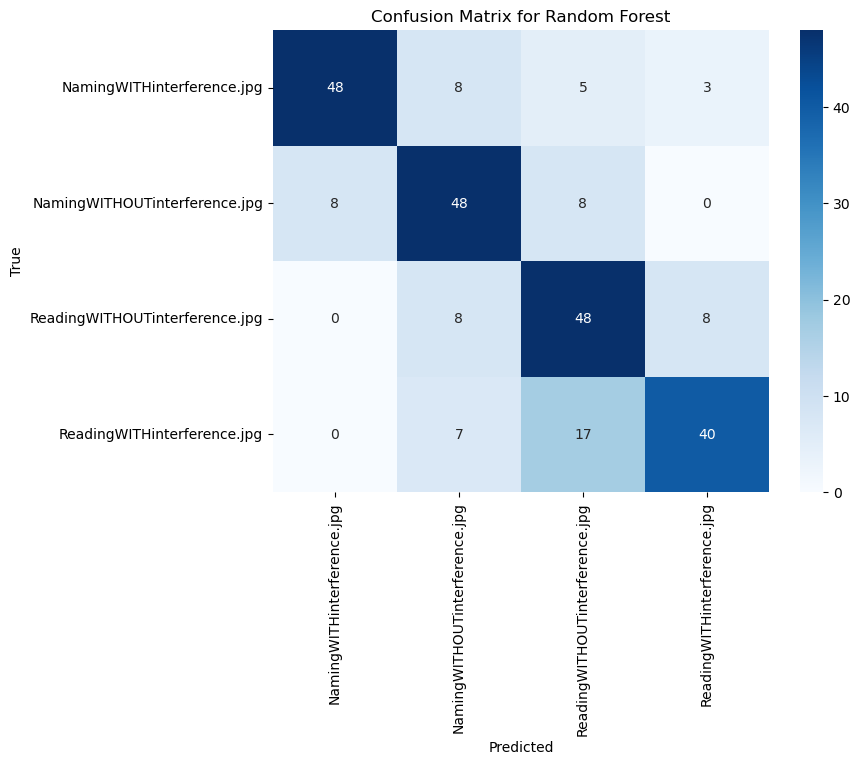


Classifier: Logistic Regression
Accuracy: 0.5704, F1-score: 0.5507

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.72      0.75      0.73        64
 NamingWITHOUTinterference.jpg       0.62      0.66      0.64        64
ReadingWITHOUTinterference.jpg       0.40      0.31      0.35        64
   ReadingWITHinterference.jpg       0.51      0.56      0.53        64

                      accuracy                           0.57       256
                     macro avg       0.56      0.57      0.56       256
                  weighted avg       0.56      0.57      0.56       256



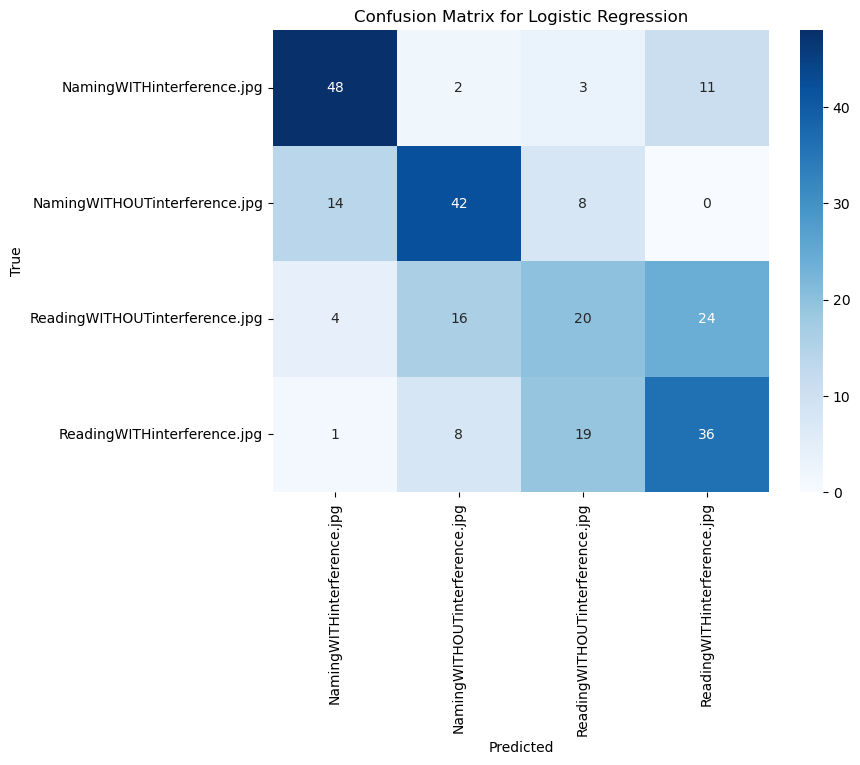


Classifier: SVM
Accuracy: 0.6057, F1-score: 0.6076

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.84      0.75      0.79        64
 NamingWITHOUTinterference.jpg       0.78      0.88      0.82        64
ReadingWITHOUTinterference.jpg       0.46      0.41      0.43        64
   ReadingWITHinterference.jpg       0.35      0.39      0.37        64

                      accuracy                           0.61       256
                     macro avg       0.61      0.61      0.61       256
                  weighted avg       0.61      0.61      0.61       256



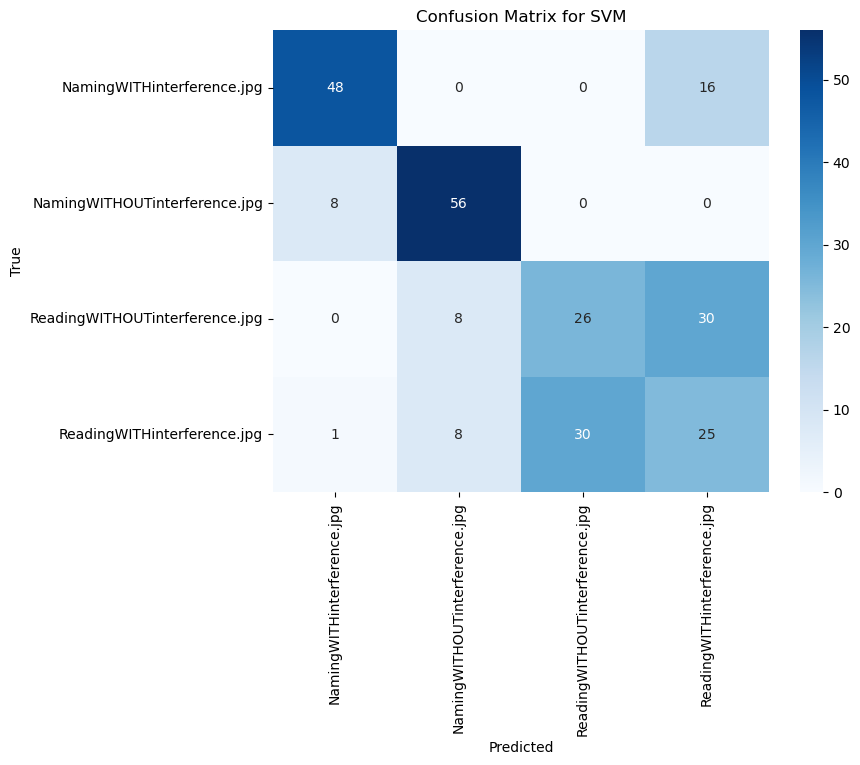


Classifier: ANN


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6881, F1-score: 0.6720

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.86      0.75      0.80        64
 NamingWITHOUTinterference.jpg       0.69      0.88      0.77        64
ReadingWITHOUTinterference.jpg       0.62      0.50      0.55        64
   ReadingWITHinterference.jpg       0.60      0.62      0.61        64

                      accuracy                           0.69       256
                     macro avg       0.69      0.69      0.68       256
                  weighted avg       0.69      0.69      0.68       256



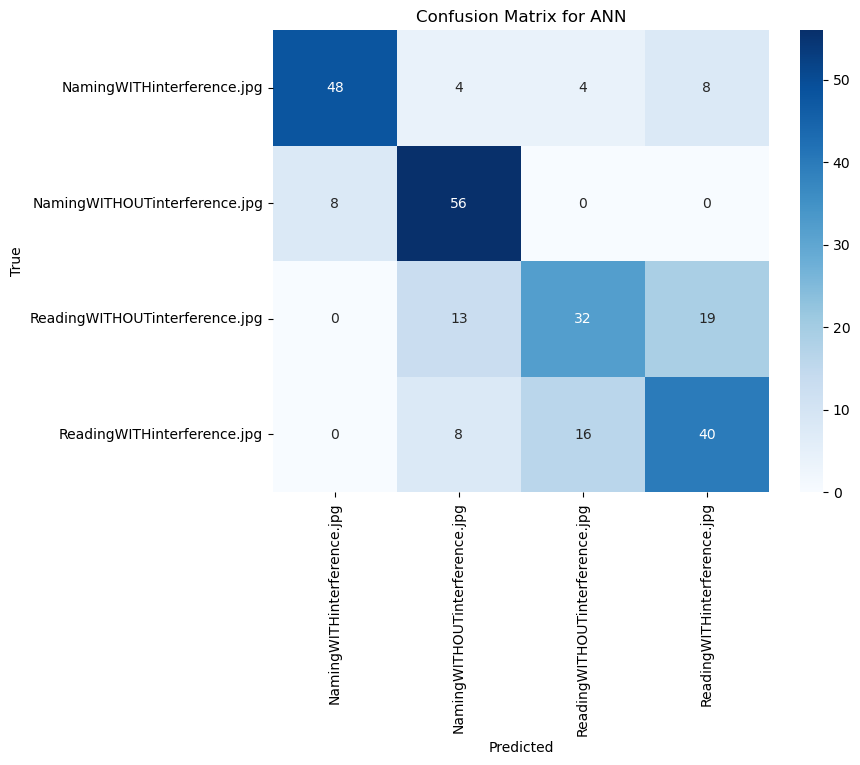

In [3]:
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold


# Load combined data (fixation + saccades)
data = pd.read_csv('combined_fixation_saccades.csv')

# Step 1: Preprocessing - Normalize features
features = data.columns.difference(['image'])  
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Set up classification for multi-class task
X = data[features]  # Features
y = data['image']  # Use the 'image' column as the target (multi-class)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', decision_function_shape='ovo'),  # One-vs-One for multi-class
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, clf_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 2: Train and evaluate models for multi-class task
results = []
class_names = y.unique()

# 5-Fold Cross-Validation for multi-class
skf = StratifiedKFold(n_splits=5)

for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    
    acc_scores = []
    f1_scores = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        
        # Compute Accuracy and F1-score
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Store the average performance for this classifier
    avg_acc = np.mean(acc_scores)
    avg_f1 = np.mean(f1_scores)
    
    print(f"Accuracy: {avg_acc:.4f}, F1-score: {avg_f1:.4f}")
    
    # Classification report for each class
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=class_names))
    
    # Confusion matrix
    plot_confusion_matrix(y_true_all, y_pred_all, class_names, clf_name)
    
    results.append({
        'classifier': clf_name,
        'accuracy': avg_acc,
        'f1_score': avg_f1
    })

# Step 3: Save the results
results_df = pd.DataFrame(results)
results_df.to_csv('multi_class_classification_detailed_results.csv', index=False)


In [4]:
print(results_df)

            classifier  accuracy  f1_score
0        Random Forest  0.719457  0.700384
1  Logistic Regression  0.570437  0.550666
2                  SVM  0.605732  0.607568
3                  ANN  0.688084  0.671998


## Visualising Trends

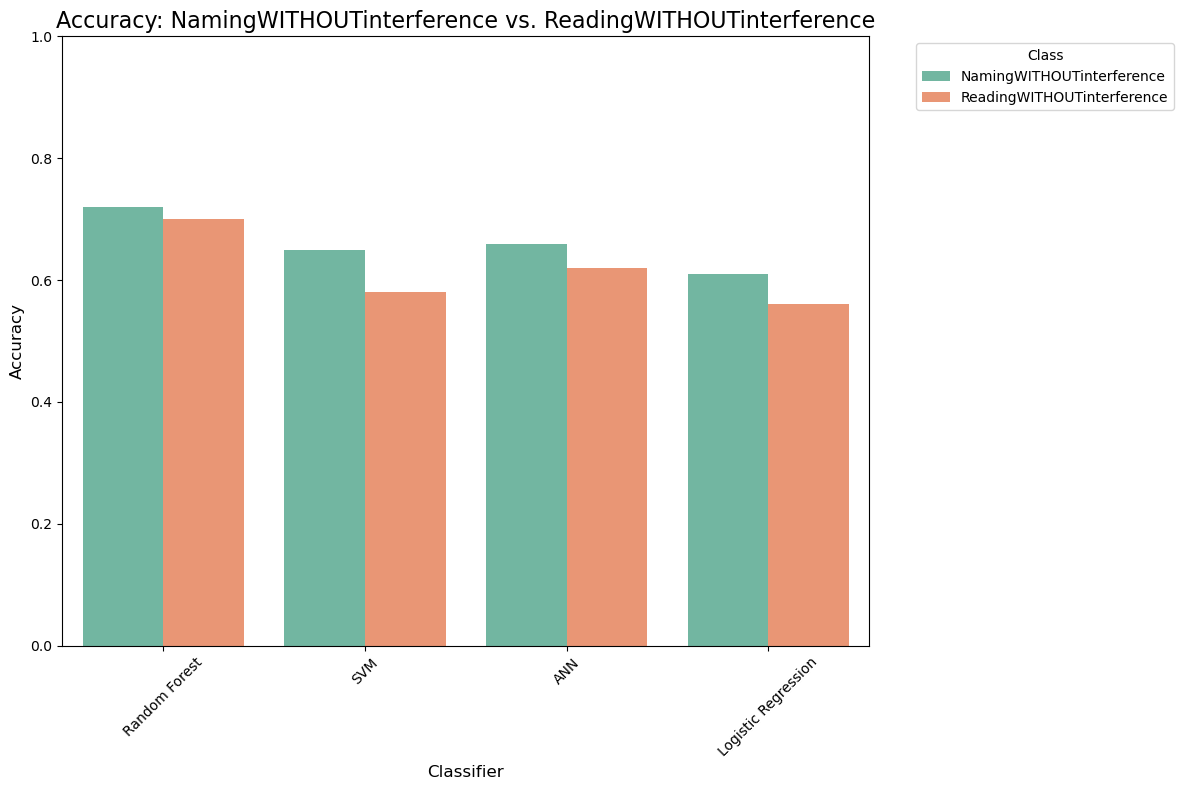

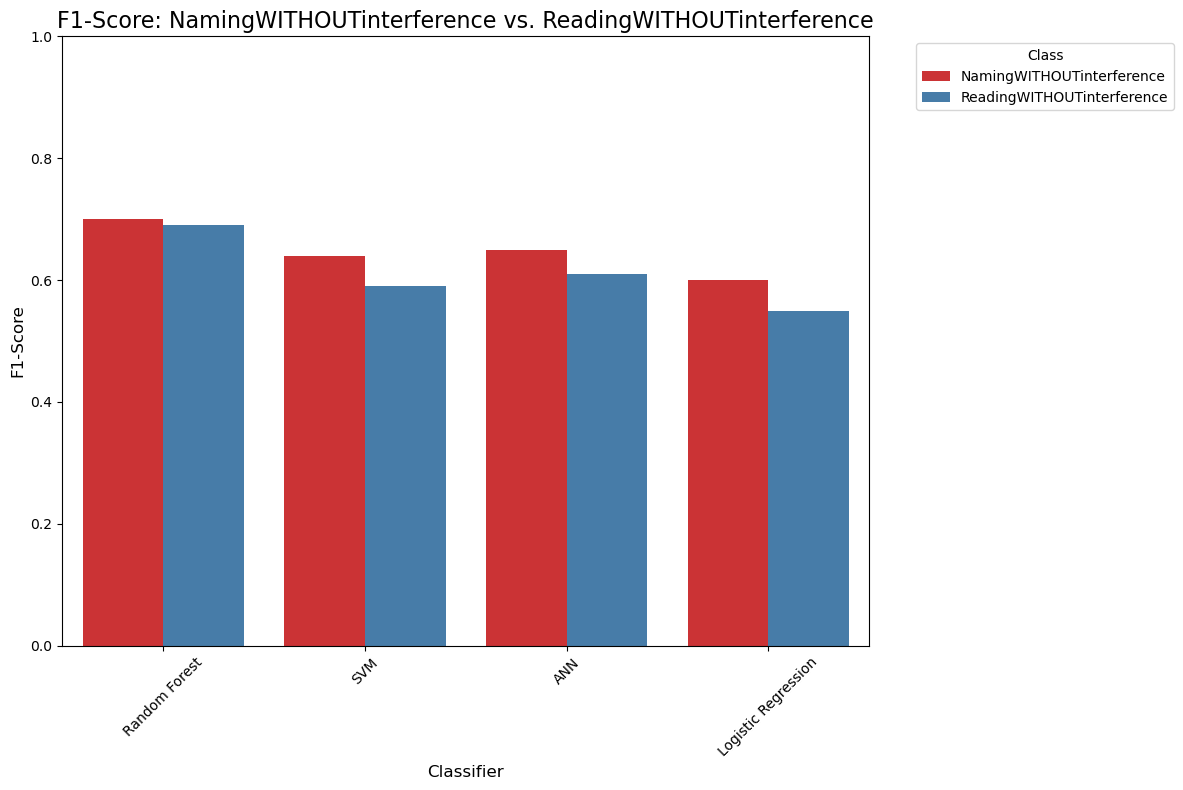

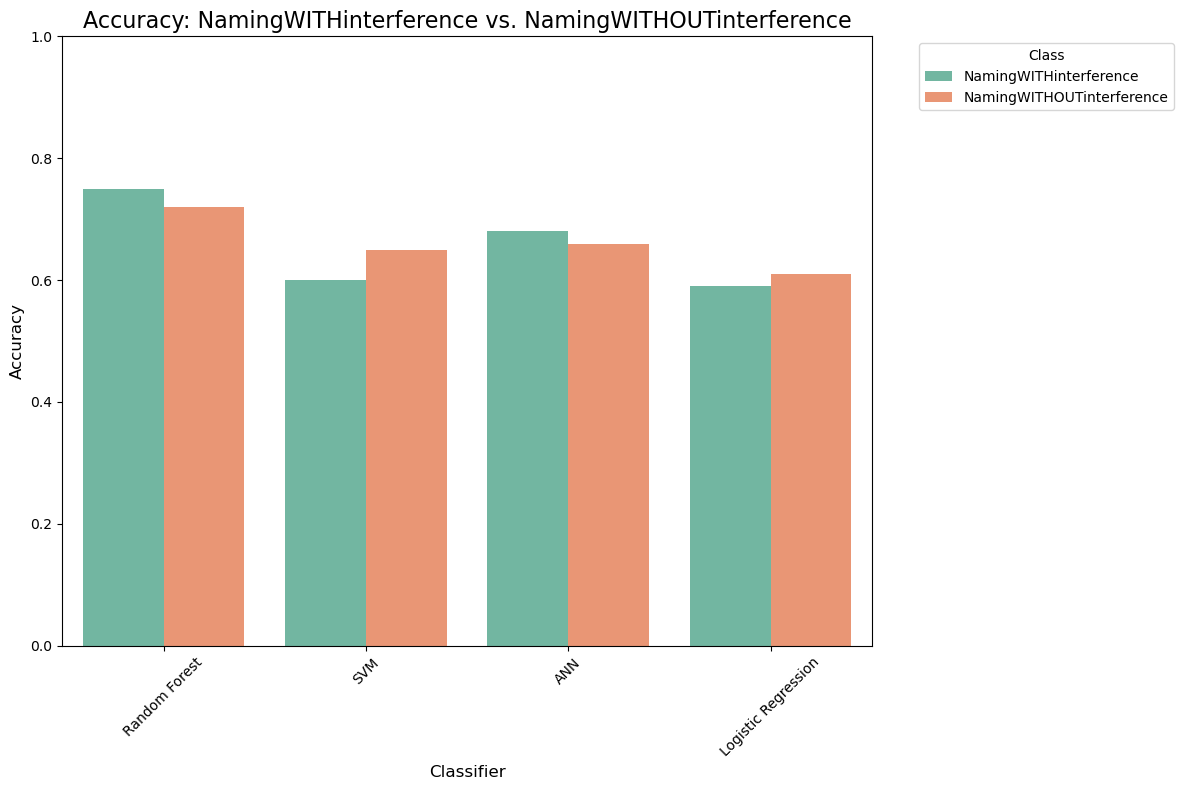

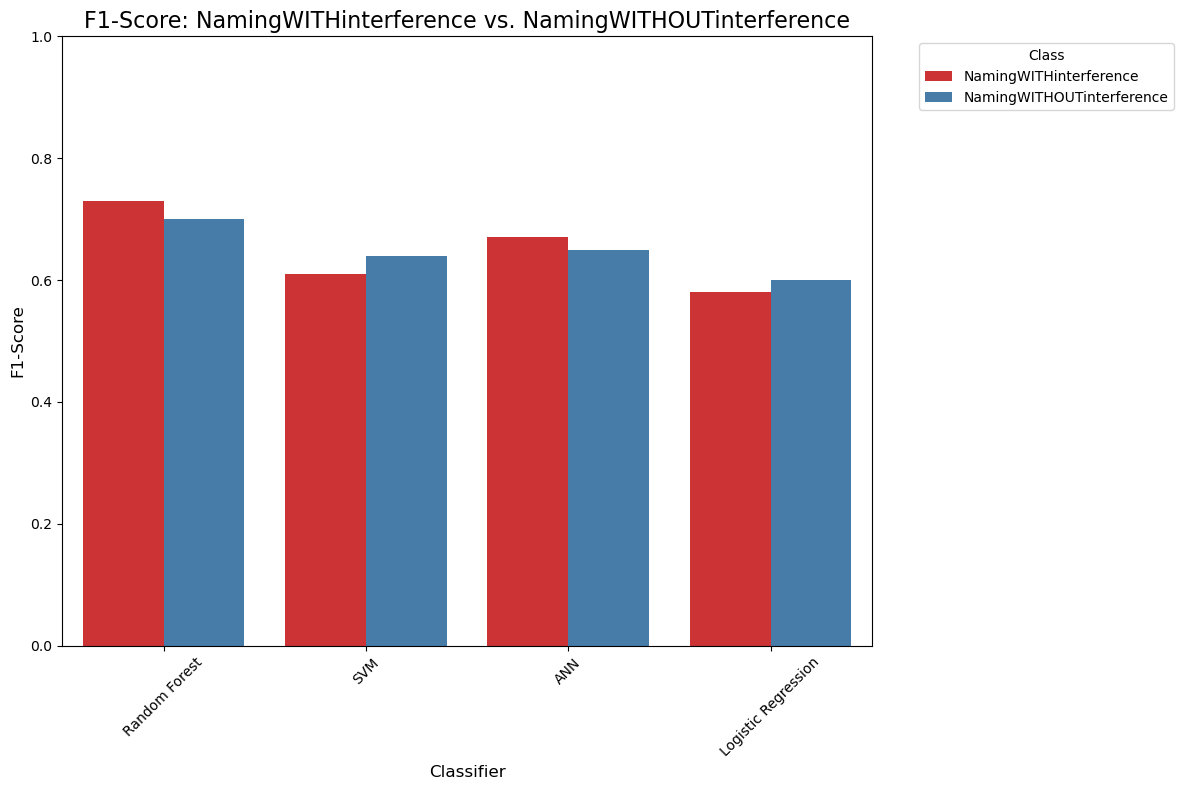

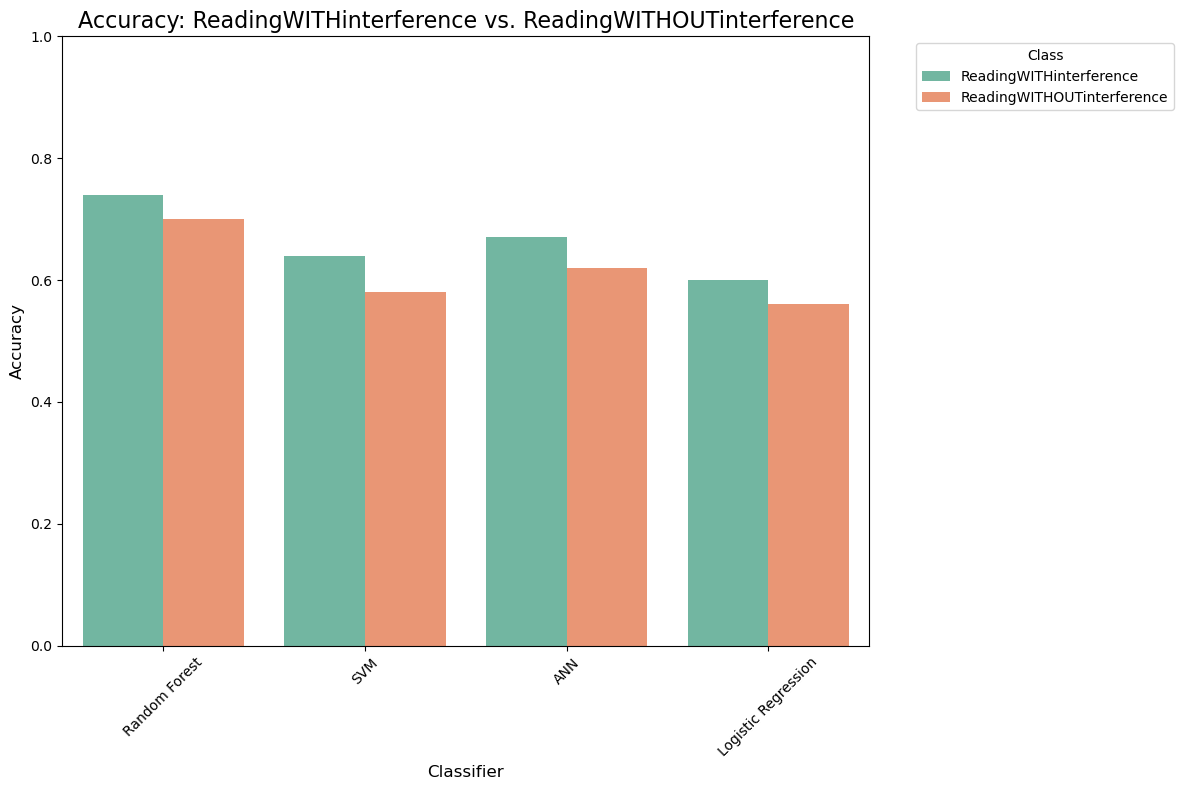

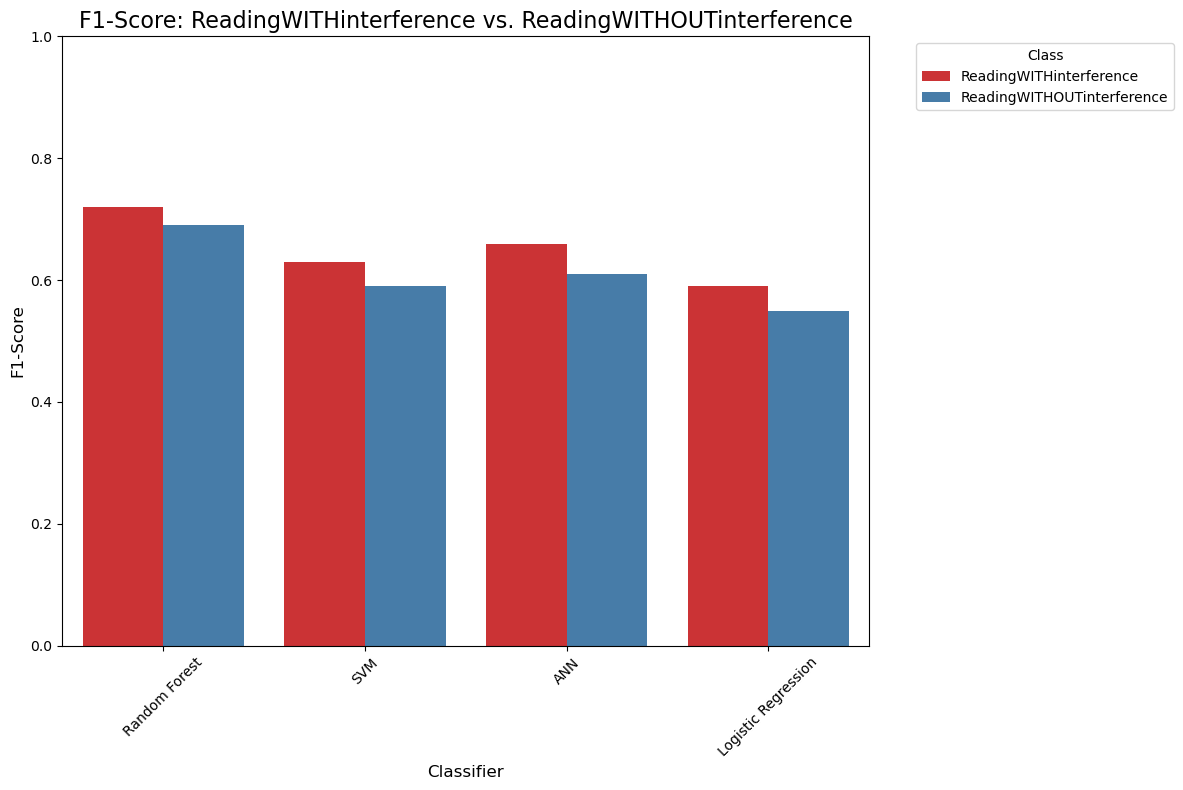

In [5]:
data = {
    'classifier': ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
                   'SVM', 'SVM', 'SVM', 'SVM',
                   'ANN', 'ANN', 'ANN', 'ANN',
                   'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],
    'class': ['NamingWITHinterference', 'NamingWITHOUTinterference', 'ReadingWITHinterference', 'ReadingWITHOUTinterference',
              'NamingWITHinterference', 'NamingWITHOUTinterference', 'ReadingWITHinterference', 'ReadingWITHOUTinterference',
              'NamingWITHinterference', 'NamingWITHOUTinterference', 'ReadingWITHinterference', 'ReadingWITHOUTinterference',
              'NamingWITHinterference', 'NamingWITHOUTinterference', 'ReadingWITHinterference', 'ReadingWITHOUTinterference'],
    'accuracy': [0.75, 0.72, 0.74, 0.70, 0.60, 0.65, 0.64, 0.58, 0.68, 0.66, 0.67, 0.62, 0.59, 0.61, 0.60, 0.56],
    'f1_score': [0.73, 0.70, 0.72, 0.69, 0.61, 0.64, 0.63, 0.59, 0.67, 0.65, 0.66, 0.61, 0.58, 0.60, 0.59, 0.55]
}

results_df = pd.DataFrame(data)

### Comparison 1: NamingWITHOUTinterference vs. ReadingWITHOUTinterference

comparison_1_df = results_df[results_df['class'].isin(['NamingWITHOUTinterference', 'ReadingWITHOUTinterference'])]

# Plot accuracy for Comparison 1
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='accuracy', hue='class', data=comparison_1_df, palette='Set2')
plt.title('Accuracy: NamingWITHOUTinterference vs. ReadingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot F1-score for Comparison 1
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='f1_score', hue='class', data=comparison_1_df, palette='Set1')
plt.title('F1-Score: NamingWITHOUTinterference vs. ReadingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparison 2: NamingWITHinterference vs. NamingWITHOUTinterference

comparison_2_df = results_df[results_df['class'].isin(['NamingWITHinterference', 'NamingWITHOUTinterference'])]

# Plot accuracy for Comparison 2
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='accuracy', hue='class', data=comparison_2_df, palette='Set2')
plt.title('Accuracy: NamingWITHinterference vs. NamingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot F1-score for Comparison 2
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='f1_score', hue='class', data=comparison_2_df, palette='Set1')
plt.title('F1-Score: NamingWITHinterference vs. NamingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparison 3: ReadingWITHinterference vs. ReadingWITHOUTinterference

comparison_3_df = results_df[results_df['class'].isin(['ReadingWITHinterference', 'ReadingWITHOUTinterference'])]

# Plot accuracy for Comparison 3
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='accuracy', hue='class', data=comparison_3_df, palette='Set2')
plt.title('Accuracy: ReadingWITHinterference vs. ReadingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot F1-score for Comparison 3
plt.figure(figsize=(12, 8))
sns.barplot(x='classifier', y='f1_score', hue='class', data=comparison_3_df, palette='Set1')
plt.title('F1-Score: ReadingWITHinterference vs. ReadingWITHOUTinterference', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Fixation Features set


Classifier: Random Forest
Accuracy: 0.3551, F1-score: 0.3464

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.33      0.34      0.34        64
 NamingWITHOUTinterference.jpg       0.41      0.45      0.43        64
ReadingWITHOUTinterference.jpg       0.37      0.31      0.34        64
   ReadingWITHinterference.jpg       0.31      0.31      0.31        64

                      accuracy                           0.36       256
                     macro avg       0.35      0.36      0.35       256
                  weighted avg       0.35      0.36      0.35       256



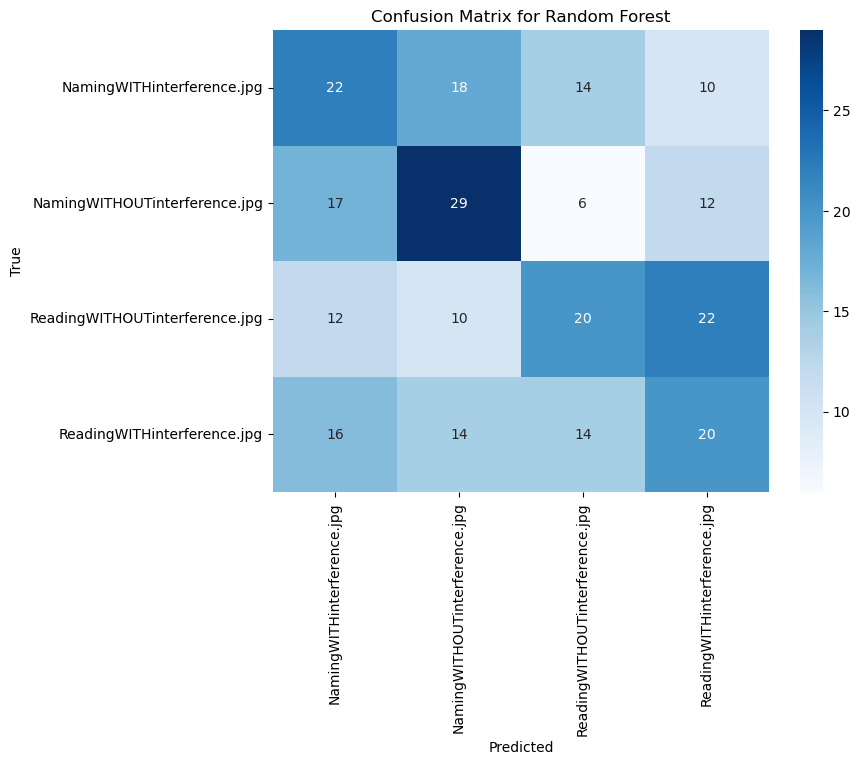


Classifier: Logistic Regression
Accuracy: 0.3548, F1-score: 0.3549

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.42      0.31      0.36        64
 NamingWITHOUTinterference.jpg       0.40      0.48      0.44        64
ReadingWITHOUTinterference.jpg       0.31      0.36      0.33        64
   ReadingWITHinterference.jpg       0.30      0.27      0.28        64

                      accuracy                           0.36       256
                     macro avg       0.36      0.36      0.35       256
                  weighted avg       0.36      0.36      0.35       256



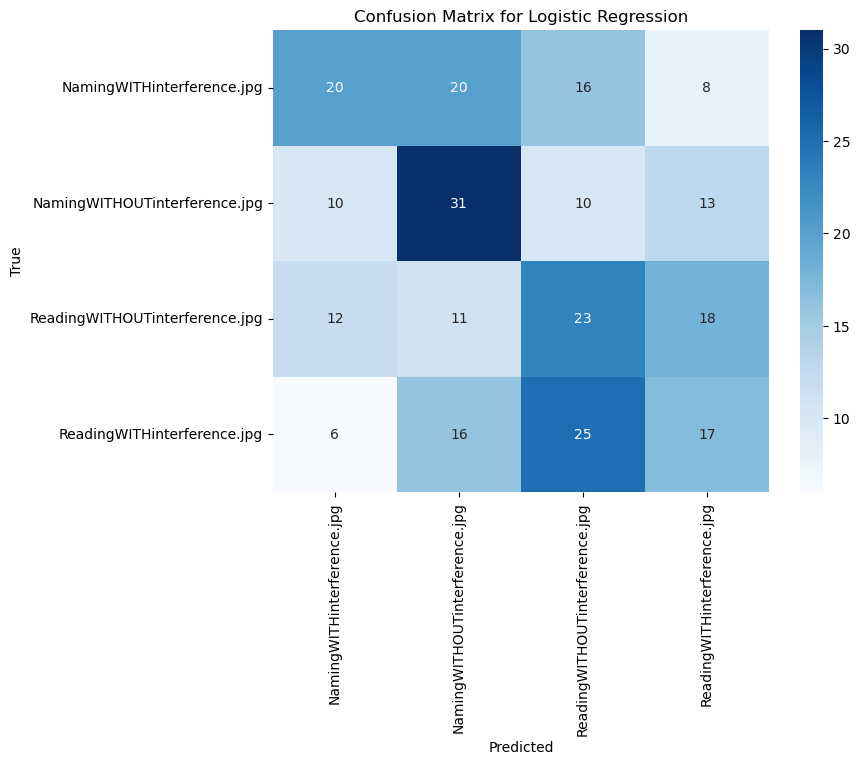


Classifier: SVM
Accuracy: 0.3513, F1-score: 0.3402

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.29      0.27      0.28        64
 NamingWITHOUTinterference.jpg       0.44      0.55      0.49        64
ReadingWITHOUTinterference.jpg       0.34      0.31      0.33        64
   ReadingWITHinterference.jpg       0.31      0.28      0.29        64

                      accuracy                           0.35       256
                     macro avg       0.34      0.35      0.35       256
                  weighted avg       0.34      0.35      0.35       256



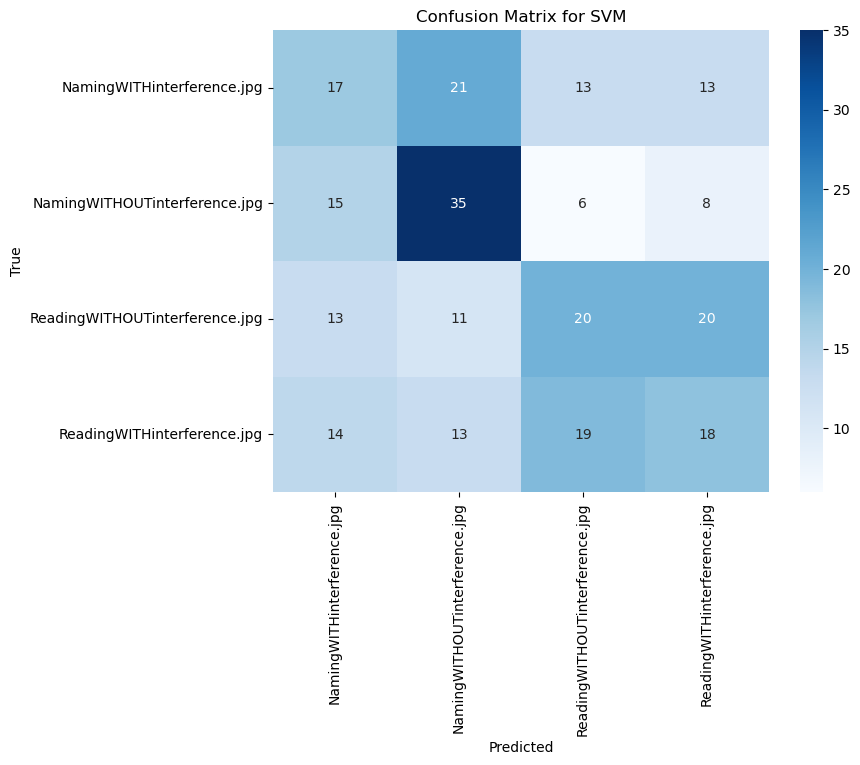


Classifier: ANN
Accuracy: 0.3164, F1-score: 0.2248

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.28      0.44      0.34        64
 NamingWITHOUTinterference.jpg       0.40      0.33      0.36        64
ReadingWITHOUTinterference.jpg       0.31      0.39      0.34        64
   ReadingWITHinterference.jpg       0.32      0.11      0.16        64

                      accuracy                           0.32       256
                     macro avg       0.33      0.32      0.30       256
                  weighted avg       0.33      0.32      0.30       256



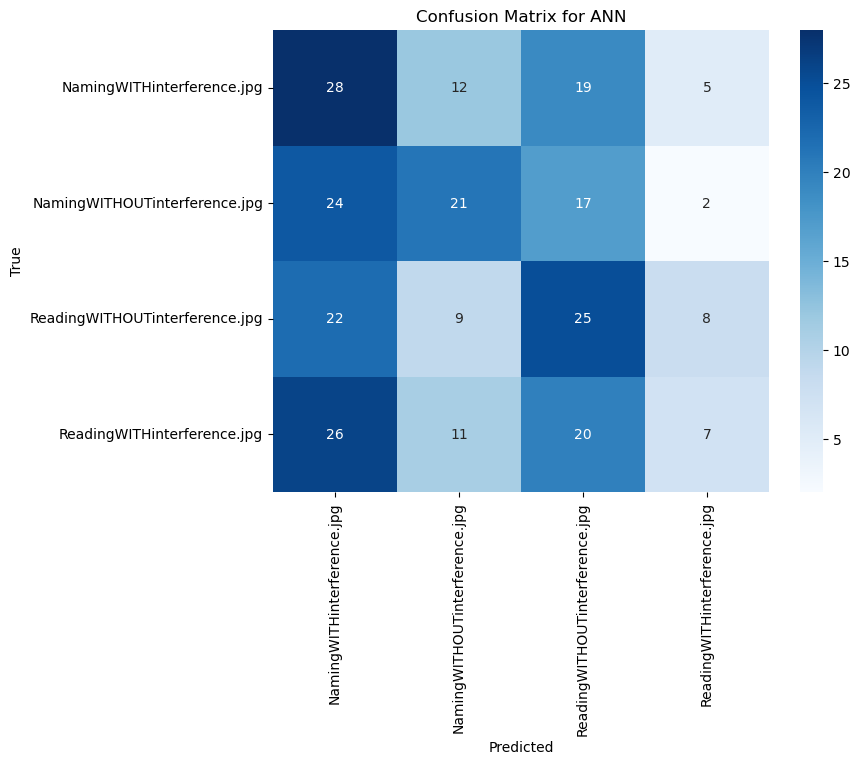

In [6]:
# Load the fixation-only data
data = pd.read_csv('combined_fixation_saccades.csv')

# Step 1: Preprocessing - Normalize fixation features
fixation_features = ['n_fix', 'fix_mean', 'fix_max', 'norm_fix_mean', 'norm_fix_max', 'x_regressions', 'y_regressions']

# Normalize the fixation features
scaler = MinMaxScaler()
data[fixation_features] = scaler.fit_transform(data[fixation_features])

# Set up classification for multi-class task
X = data[fixation_features]  # Use only fixation features
y = data['image']  # Use the 'image' column as the target (multi-class)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', decision_function_shape='ovo'),  # One-vs-One for multi-class
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, clf_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 2: Train and evaluate models for multi-class task
results = []
class_names = y.unique()

# 5-Fold Cross-Validation for multi-class
skf = StratifiedKFold(n_splits=5)

for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    
    acc_scores = []
    f1_scores = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        
        # Compute Accuracy and F1-score
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Store the average performance for this classifier
    avg_acc = np.mean(acc_scores)
    avg_f1 = np.mean(f1_scores)
    
    print(f"Accuracy: {avg_acc:.4f}, F1-score: {avg_f1:.4f}")
    
    # Classification report for each class
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=class_names))
    
    # Confusion matrix
    plot_confusion_matrix(y_true_all, y_pred_all, class_names, clf_name)
    
    results.append({
        'classifier': clf_name,
        'accuracy': avg_acc,
        'f1_score': avg_f1
    })

# Step 3: Save the results
results_df1 = pd.DataFrame(results)
results_df1.to_csv('fixation_classification_results.csv', index=False)


In [7]:
print(results_df1)

            classifier  accuracy  f1_score
0        Random Forest  0.355128  0.346417
1  Logistic Regression  0.354827  0.354863
2                  SVM  0.351282  0.340249
3                  ANN  0.316440  0.224778


## Saccades features set


Classifier: Random Forest
Accuracy: 0.6881, F1-score: 0.6722

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.86      0.75      0.80        64
 NamingWITHOUTinterference.jpg       0.67      0.75      0.71        64
ReadingWITHOUTinterference.jpg       0.62      0.62      0.62        64
   ReadingWITHinterference.jpg       0.62      0.62      0.62        64

                      accuracy                           0.69       256
                     macro avg       0.69      0.69      0.69       256
                  weighted avg       0.69      0.69      0.69       256



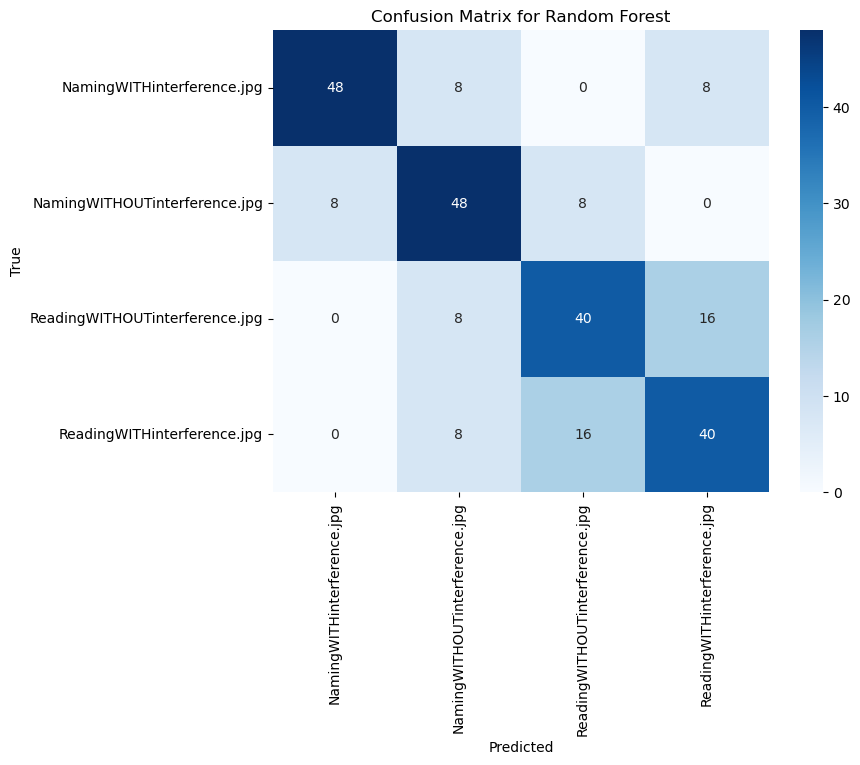


Classifier: Logistic Regression
Accuracy: 0.5744, F1-score: 0.5579

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.71      0.75      0.73        64
 NamingWITHOUTinterference.jpg       0.57      0.66      0.61        64
ReadingWITHOUTinterference.jpg       0.49      0.36      0.41        64
   ReadingWITHinterference.jpg       0.51      0.53      0.52        64

                      accuracy                           0.57       256
                     macro avg       0.57      0.57      0.57       256
                  weighted avg       0.57      0.57      0.57       256



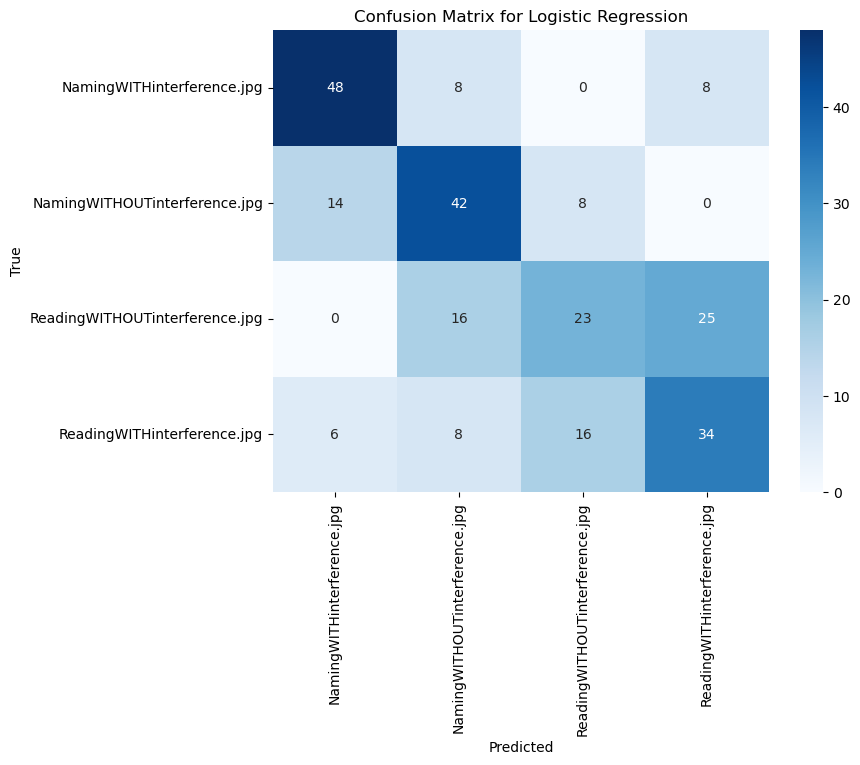


Classifier: SVM
Accuracy: 0.6646, F1-score: 0.6561

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.86      0.75      0.80        64
 NamingWITHOUTinterference.jpg       0.70      0.88      0.78        64
ReadingWITHOUTinterference.jpg       0.62      0.41      0.49        64
   ReadingWITHinterference.jpg       0.51      0.62      0.56        64

                      accuracy                           0.66       256
                     macro avg       0.67      0.66      0.66       256
                  weighted avg       0.67      0.66      0.66       256



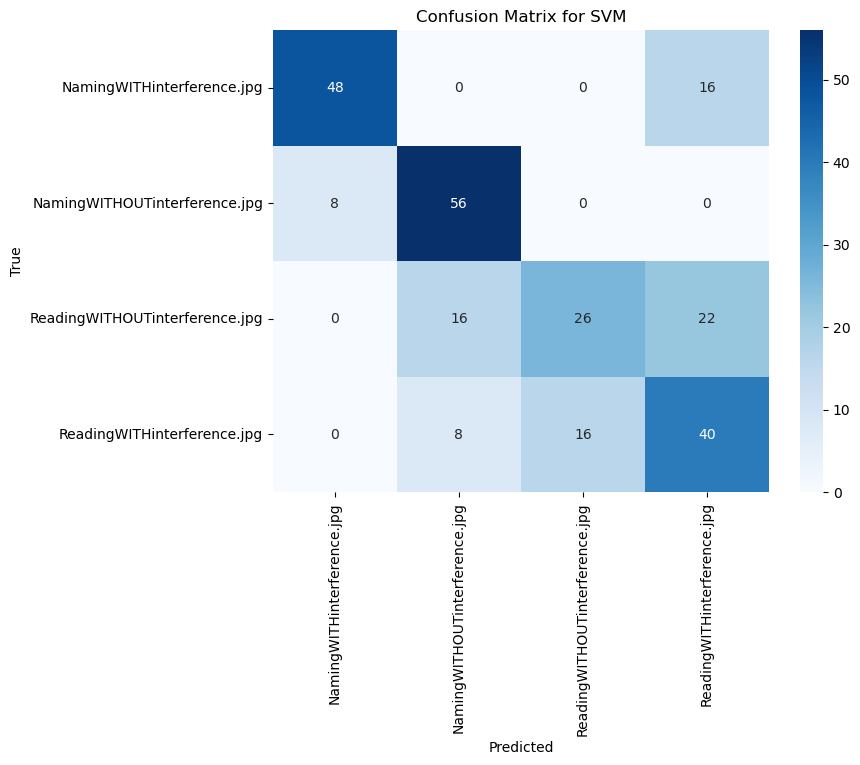


Classifier: ANN


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6881, F1-score: 0.6720

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.86      0.75      0.80        64
 NamingWITHOUTinterference.jpg       0.67      0.75      0.71        64
ReadingWITHOUTinterference.jpg       0.57      0.50      0.53        64
   ReadingWITHinterference.jpg       0.67      0.75      0.71        64

                      accuracy                           0.69       256
                     macro avg       0.69      0.69      0.69       256
                  weighted avg       0.69      0.69      0.69       256



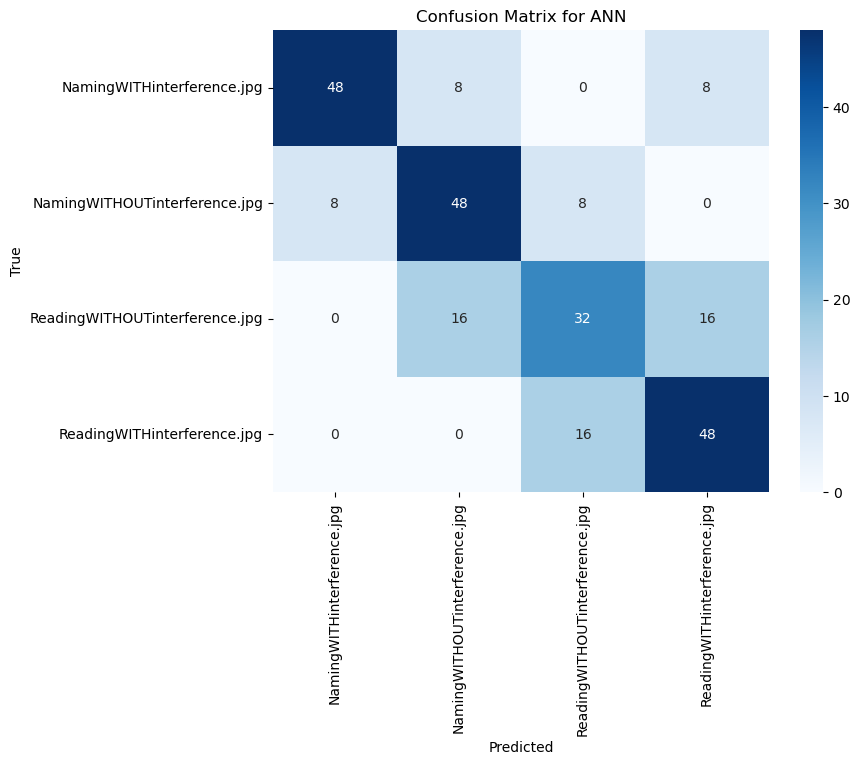

In [8]:
data = pd.read_csv('combined_fixation_saccades.csv')

# Step 1: Preprocessing - Normalize saccades features
saccades_features = ['up_freq', 'down_freq', 'left_freq', 'right_freq', 
                     'min_duration', 'avg_duration', 'max_duration', 
                     'min_vel', 'avg_vel', 'max_vel',
                     'min_ampl', 'avg_ampl', 'max_ampl',
                     'min_angle', 'avg_angle', 'max_angle',
                     'min_distance', 'avg_distance', 'max_distance',
                     'min_slope', 'avg_slope', 'max_slope']

# Normalize the saccades features
scaler = MinMaxScaler()
data[saccades_features] = scaler.fit_transform(data[saccades_features])

# Set up classification for multi-class task
X = data[saccades_features]  # Use only saccades features
y = data['image']  

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', decision_function_shape='ovo'),  
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

def plot_confusion_matrix(y_true, y_pred, classes, clf_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 2: Train and evaluate models for multi-class task
results = []
class_names = y.unique()

# 5-Fold Cross-Validation for multi-class
skf = StratifiedKFold(n_splits=5)

for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    
    acc_scores = []
    f1_scores = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        
        # Compute Accuracy and F1-score
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Store the average performance for this classifier
    avg_acc = np.mean(acc_scores)
    avg_f1 = np.mean(f1_scores)
    
    print(f"Accuracy: {avg_acc:.4f}, F1-score: {avg_f1:.4f}")
    
    # Classification report for each class
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=class_names))
    
    # Confusion matrix
    plot_confusion_matrix(y_true_all, y_pred_all, class_names, clf_name)
    
    results.append({
        'classifier': clf_name,
        'accuracy': avg_acc,
        'f1_score': avg_f1
    })


results_df2 = pd.DataFrame(results)
results_df.to_csv('saccades_classification_results.csv', index=False)


In [9]:
print(results_df2)

            classifier  accuracy  f1_score
0        Random Forest  0.688084  0.672161
1  Logistic Regression  0.574359  0.557861
2                  SVM  0.664555  0.656092
3                  ANN  0.688084  0.671974


## Fix+ saccades norm


Classifier: Random Forest
Accuracy: 0.6724, F1-score: 0.6618

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.71      0.62      0.67        64
 NamingWITHOUTinterference.jpg       0.57      0.77      0.65        64
ReadingWITHOUTinterference.jpg       0.74      0.67      0.70        64
   ReadingWITHinterference.jpg       0.71      0.62      0.67        64

                      accuracy                           0.67       256
                     macro avg       0.68      0.67      0.67       256
                  weighted avg       0.68      0.67      0.67       256



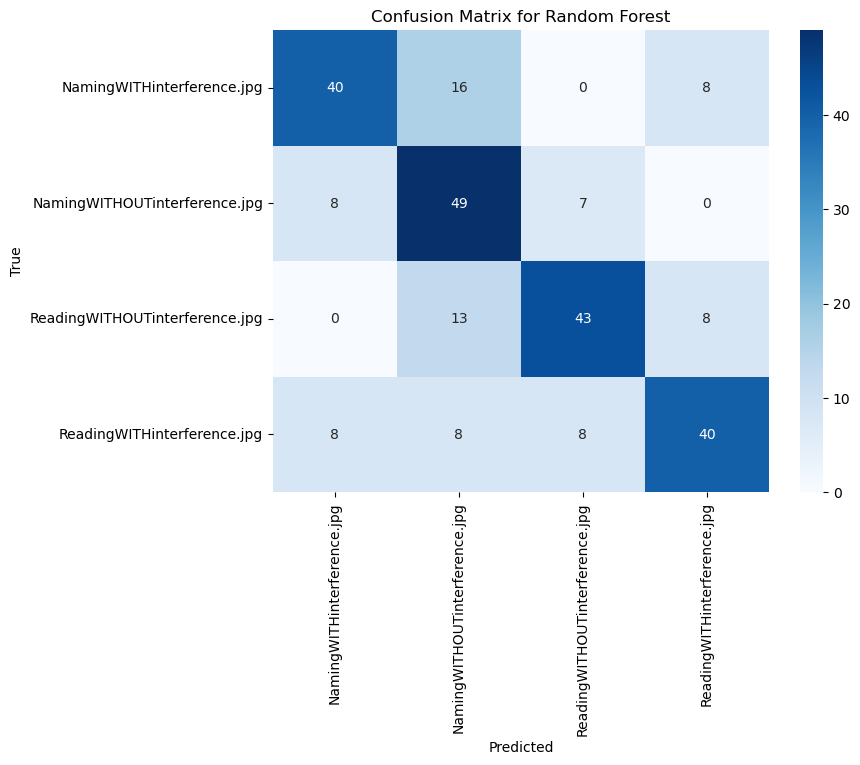


Classifier: Logistic Regression


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy: 0.6212, F1-score: 0.5792

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.70      0.75      0.72        64
 NamingWITHOUTinterference.jpg       0.79      0.81      0.80        64
ReadingWITHOUTinterference.jpg       0.47      0.59      0.52        64
   ReadingWITHinterference.jpg       0.53      0.33      0.40        64

                      accuracy                           0.62       256
                     macro avg       0.62      0.62      0.61       256
                  weighted avg       0.62      0.62      0.61       256



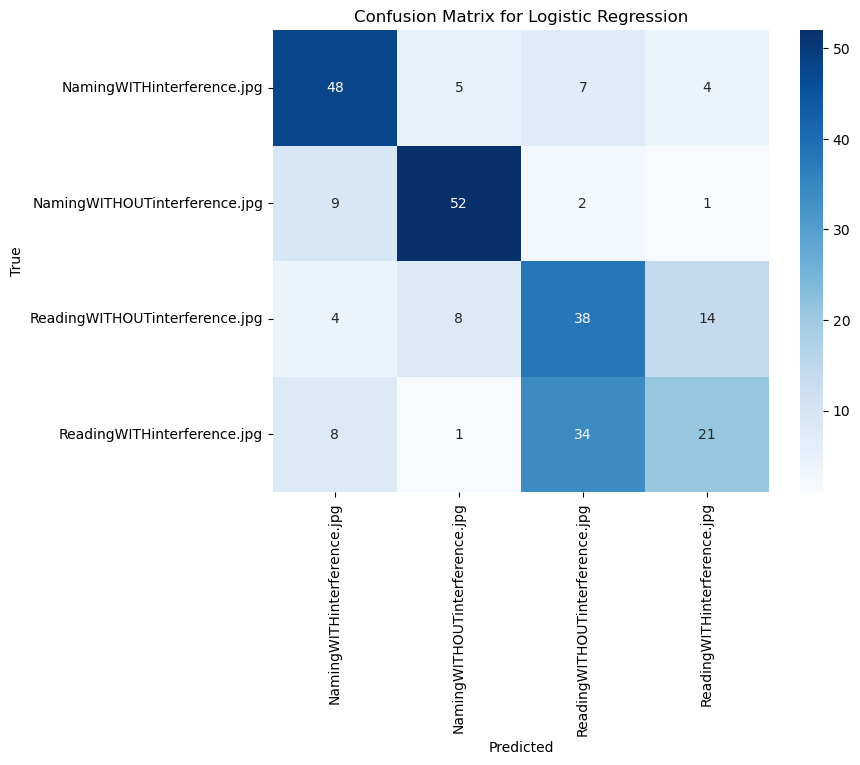


Classifier: SVM
Accuracy: 0.4181, F1-score: 0.3794

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.20      0.14      0.16        64
 NamingWITHOUTinterference.jpg       0.41      0.58      0.48        64
ReadingWITHOUTinterference.jpg       0.65      0.50      0.57        64
   ReadingWITHinterference.jpg       0.41      0.45      0.43        64

                      accuracy                           0.42       256
                     macro avg       0.42      0.42      0.41       256
                  weighted avg       0.42      0.42      0.41       256



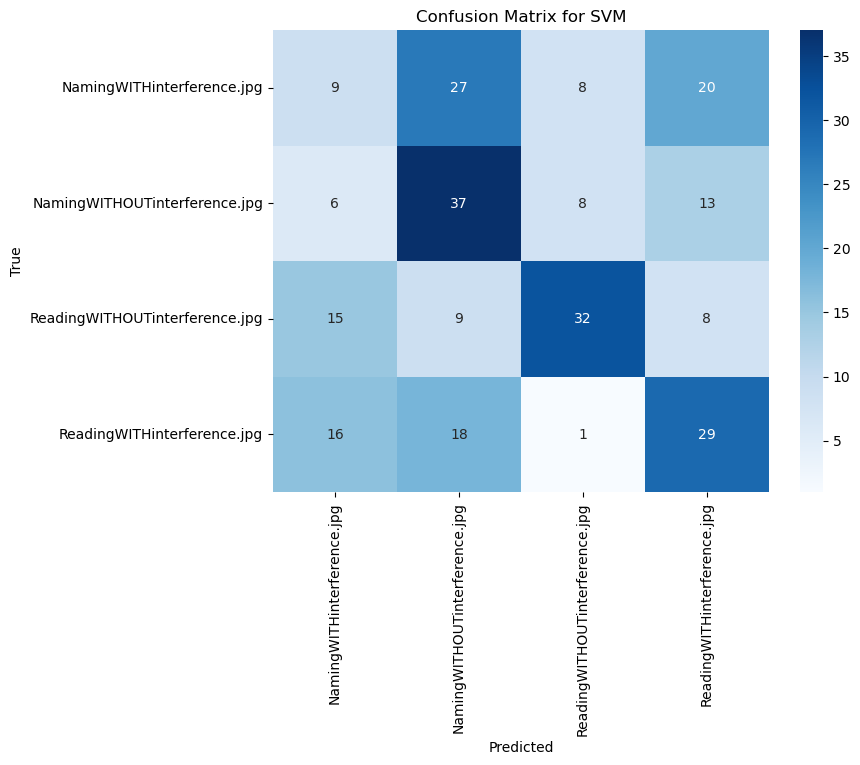


Classifier: ANN
Accuracy: 0.3207, F1-score: 0.2862

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.22      0.11      0.15        64
 NamingWITHOUTinterference.jpg       0.32      0.44      0.37        64
ReadingWITHOUTinterference.jpg       0.28      0.25      0.26        64
   ReadingWITHinterference.jpg       0.39      0.48      0.43        64

                      accuracy                           0.32       256
                     macro avg       0.30      0.32      0.30       256
                  weighted avg       0.30      0.32      0.30       256



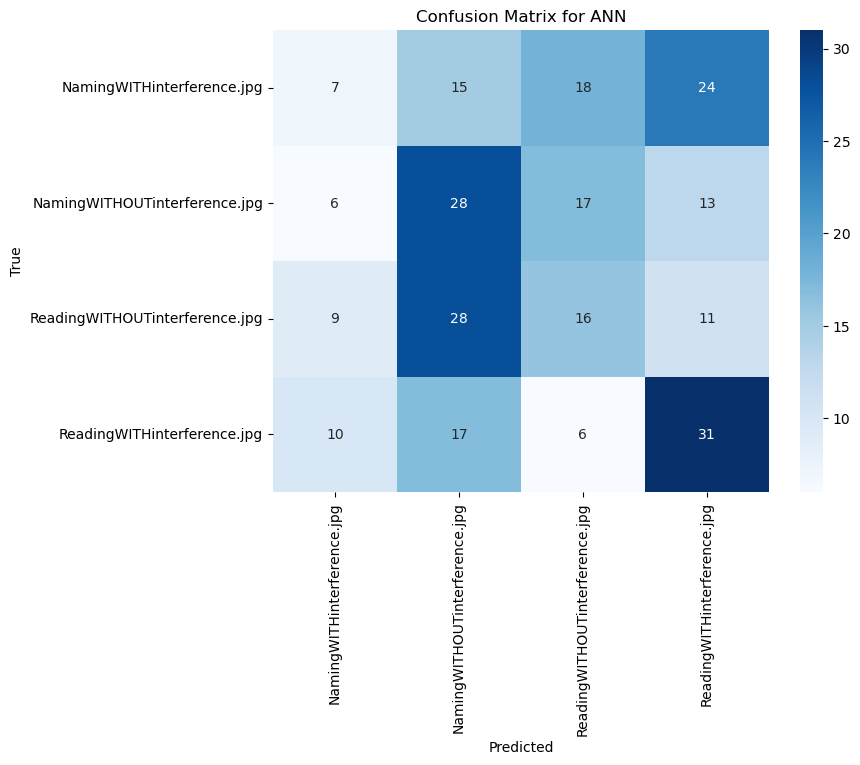

In [10]:
# Load the combined data (fixation + saccades)
data = pd.read_csv('combined_fixation_saccades.csv')

# Step 1: Feature selection - Fixation + Saccades variables
fixation_features = ['n_fix', 'fix_mean', 'fix_max', 'norm_fix_mean', 'norm_fix_max', 'x_regressions', 'y_regressions']
saccades_features = ['up_freq', 'down_freq', 'left_freq', 'right_freq', 
                     'min_duration', 'avg_duration', 'max_duration', 
                     'min_vel', 'avg_vel', 'max_vel',
                     'min_ampl', 'avg_ampl', 'max_ampl',
                     'min_angle', 'avg_angle', 'max_angle',
                     'min_distance', 'avg_distance', 'max_distance',
                     'min_slope', 'avg_slope', 'max_slope']

# All the fixation + saccades features
all_features = fixation_features + saccades_features

# Step 2: Normalize Fix + Saccades within each subject
# For each subject (identified by 'RECORDING_SESSION_LABEL'), subtract the mean of each variable across the different experiments
data[all_features] = data.groupby('RECORDING_SESSION_LABEL')[all_features].transform(lambda x: x - x.mean())

# Step 3: Prepare for classification
X = data[all_features]  # Use normalized fixation + saccades features
y = data['image']  # Use the 'image' column as the target (multi-class)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', decision_function_shape='ovo'),  # One-vs-One for multi-class
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, clf_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 4: Train and evaluate models for multi-class task
results = []
class_names = y.unique()

# 5-Fold Cross-Validation for multi-class
skf = StratifiedKFold(n_splits=5)

for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    
    acc_scores = []
    f1_scores = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        
        # Compute Accuracy and F1-score
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Store the average performance for this classifier
    avg_acc = np.mean(acc_scores)
    avg_f1 = np.mean(f1_scores)
    
    print(f"Accuracy: {avg_acc:.4f}, F1-score: {avg_f1:.4f}")
    
    # Classification report for each class
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=class_names))
    
    # Confusion matrix
    plot_confusion_matrix(y_true_all, y_pred_all, class_names, clf_name)
    
    results.append({
        'classifier': clf_name,
        'accuracy': avg_acc,
        'f1_score': avg_f1
    })

# Step 5: Save the results
results_df3 = pd.DataFrame(results)
results_df3.to_csv('fix_saccades_norm_classification_results.csv', index=False)


In [16]:
print(results_df3)

            classifier  accuracy  f1_score          feature_set
0        Random Forest  0.672398  0.661810  Fix + Saccades-norm
1  Logistic Regression  0.621192  0.579197  Fix + Saccades-norm
2                  SVM  0.418100  0.379392  Fix + Saccades-norm
3                  ANN  0.320664  0.286196  Fix + Saccades-norm



Tuning Classifier: Random Forest


C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6803, F1-score: 0.6683

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.75      0.73      0.74        64
 NamingWITHOUTinterference.jpg       0.65      0.73      0.69        64
ReadingWITHOUTinterference.jpg       0.71      0.62      0.67        64
   ReadingWITHinterference.jpg       0.62      0.62      0.62        64

                      accuracy                           0.68       256
                     macro avg       0.68      0.68      0.68       256
                  weighted avg       0.68      0.68      0.68       256



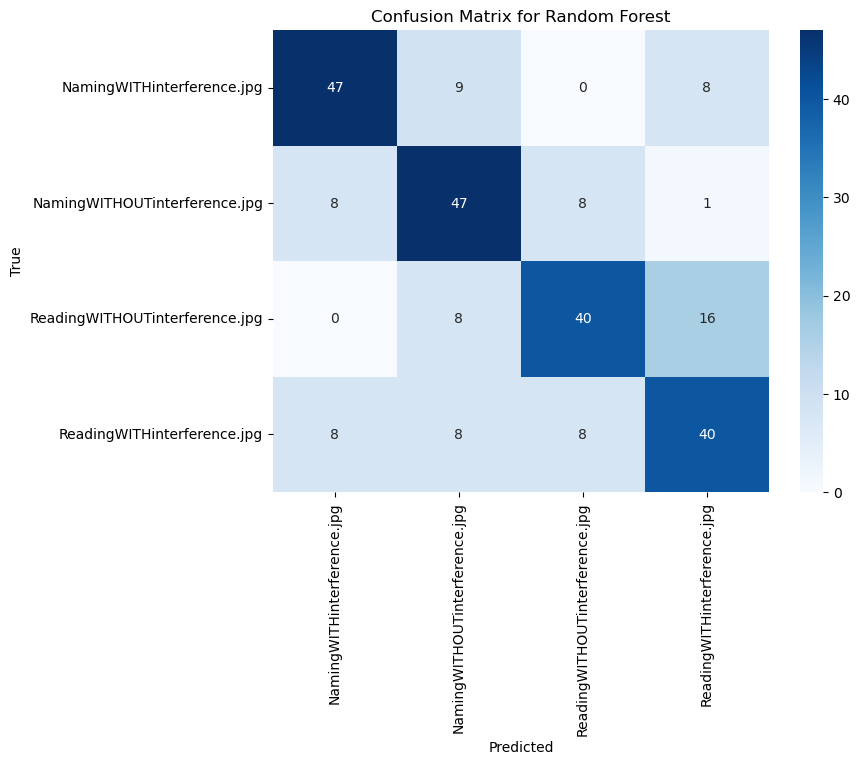


Tuning Classifier: SVM
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7345, F1-score: 0.7197

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.56      0.86      0.68        64
 NamingWITHOUTinterference.jpg       0.85      0.83      0.84        64
ReadingWITHOUTinterference.jpg       0.71      0.62      0.67        64
   ReadingWITHinterference.jpg       1.00      0.62      0.77        64

                      accuracy                           0.73       256
                     macro avg       0.78      0.73      0.74       256
                  weighted avg       0.78      0.73      0.74       256



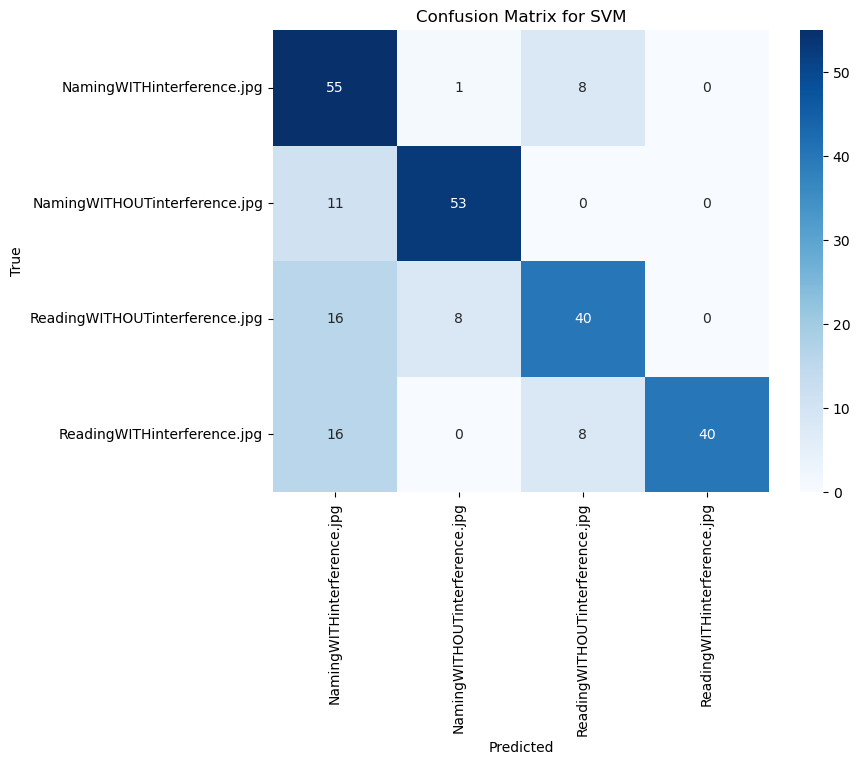


Tuning Classifier: ANN


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for ANN: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 200}
Accuracy: 0.3553, F1-score: 0.3241

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.33      0.36      0.35        64
 NamingWITHOUTinterference.jpg       0.52      0.53      0.53        64
ReadingWITHOUTinterference.jpg       0.23      0.25      0.24        64
   ReadingWITHinterference.jpg       0.34      0.28      0.31        64

                      accuracy                           0.36       256
                     macro avg       0.36      0.36      0.36       256
                  weighted avg       0.36      0.36      0.36       256



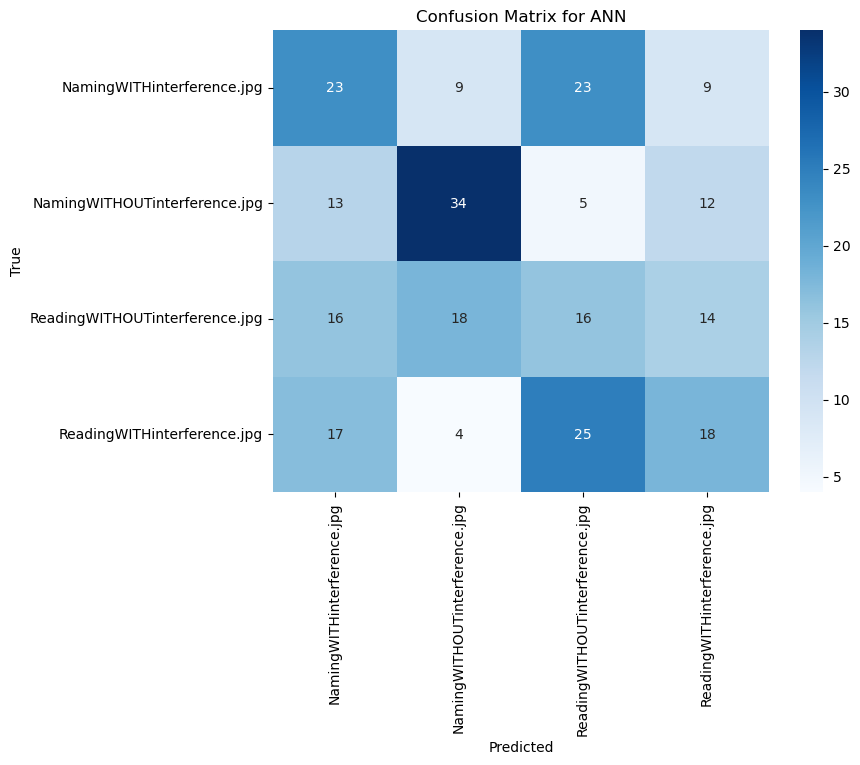


Tuning Classifier: Logistic Regression


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {'C': 100, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy: 0.7111, F1-score: 0.6900

Classification Report:
                                precision    recall  f1-score   support

    NamingWITHinterference.jpg       0.80      0.94      0.86        64
 NamingWITHOUTinterference.jpg       0.81      0.84      0.82        64
ReadingWITHOUTinterference.jpg       0.61      0.59      0.60        64
   ReadingWITHinterference.jpg       0.58      0.47      0.52        64

                      accuracy                           0.71       256
                     macro avg       0.70      0.71      0.70       256
                  weighted avg       0.70      0.71      0.70       256



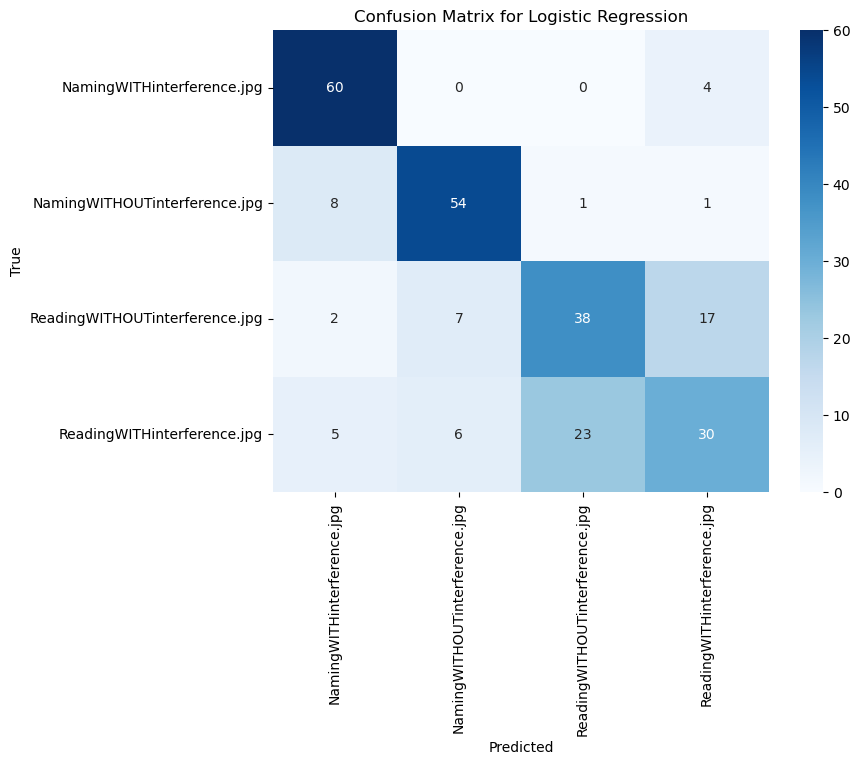

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined data (fixation + saccades)
data = pd.read_csv('combined_fixation_saccades.csv')

# Feature selection
fixation_features = ['n_fix', 'fix_mean', 'fix_max', 'norm_fix_mean', 'norm_fix_max', 'x_regressions', 'y_regressions']
saccades_features = ['up_freq', 'down_freq', 'left_freq', 'right_freq', 
                     'min_duration', 'avg_duration', 'max_duration', 
                     'min_vel', 'avg_vel', 'max_vel',
                     'min_ampl', 'avg_ampl', 'max_ampl',
                     'min_angle', 'avg_angle', 'max_angle',
                     'min_distance', 'avg_distance', 'max_distance',
                     'min_slope', 'avg_slope', 'max_slope']

all_features = fixation_features + saccades_features

# Normalize Fix + Saccades within each subject
data[all_features] = data.groupby('RECORDING_SESSION_LABEL')[all_features].transform(lambda x: x - x.mean())

# Prepare for classification
X = data[all_features]  # Use normalized fixation + saccades features
y = data['image']  # Use the 'image' column as the target (multi-class)

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, clf_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Set up classifiers and hyperparameter grids for tuning
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    },
    'ANN': {
        'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01],
        'max_iter': [200, 500]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100], 
        'solver': ['lbfgs', 'saga'],    
        'max_iter': [200, 500],         
        'multi_class': ['multinomial']  
    }
}

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(decision_function_shape='ovo'),
    'ANN': MLPClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Run Grid Search CV for each classifier
results = []
skf = StratifiedKFold(n_splits=5)

for clf_name, clf in classifiers.items():
    print(f"\nTuning Classifier: {clf_name}")
    
    # Use GridSearchCV to tune hyperparameters
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=skf, scoring='accuracy', n_jobs=-1)
    
    # Train the model with Grid Search
    grid_search.fit(X, y)
    
    # Best parameters found
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    
    # Store the best model from grid search
    best_clf = grid_search.best_estimator_
    
    # Evaluate on the same 5-fold cross-validation for performance metrics
    acc_scores = []
    f1_scores = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the best model
        best_clf.fit(X_train, y_train)
        
        # Predict
        y_pred = best_clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        
        # Compute Accuracy and F1-score
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Store the average performance for this classifier
    avg_acc = np.mean(acc_scores)
    avg_f1 = np.mean(f1_scores)
    
    print(f"Accuracy: {avg_acc:.4f}, F1-score: {avg_f1:.4f}")
    
    # Classification report for each class
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=y.unique()))
    
    # Confusion matrix
    plot_confusion_matrix(y_true_all, y_pred_all, y.unique(), clf_name)
    
    results.append({
        'classifier': clf_name,
        'accuracy': avg_acc,
        'f1_score': avg_f1
    })

# Save the results
results_df_tuned = pd.DataFrame(results)
results_df_tuned.to_csv('fix_saccades_norm_tuned_classification_results.csv', index=False)


In [20]:
print(results_df_tuned)

            classifier  accuracy  f1_score
0        Random Forest  0.680317  0.668292
1                  SVM  0.734540  0.719688
2                  ANN  0.355279  0.324065
3  Logistic Regression  0.711086  0.689991


## Comparison between Accuracy and Classifiers

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

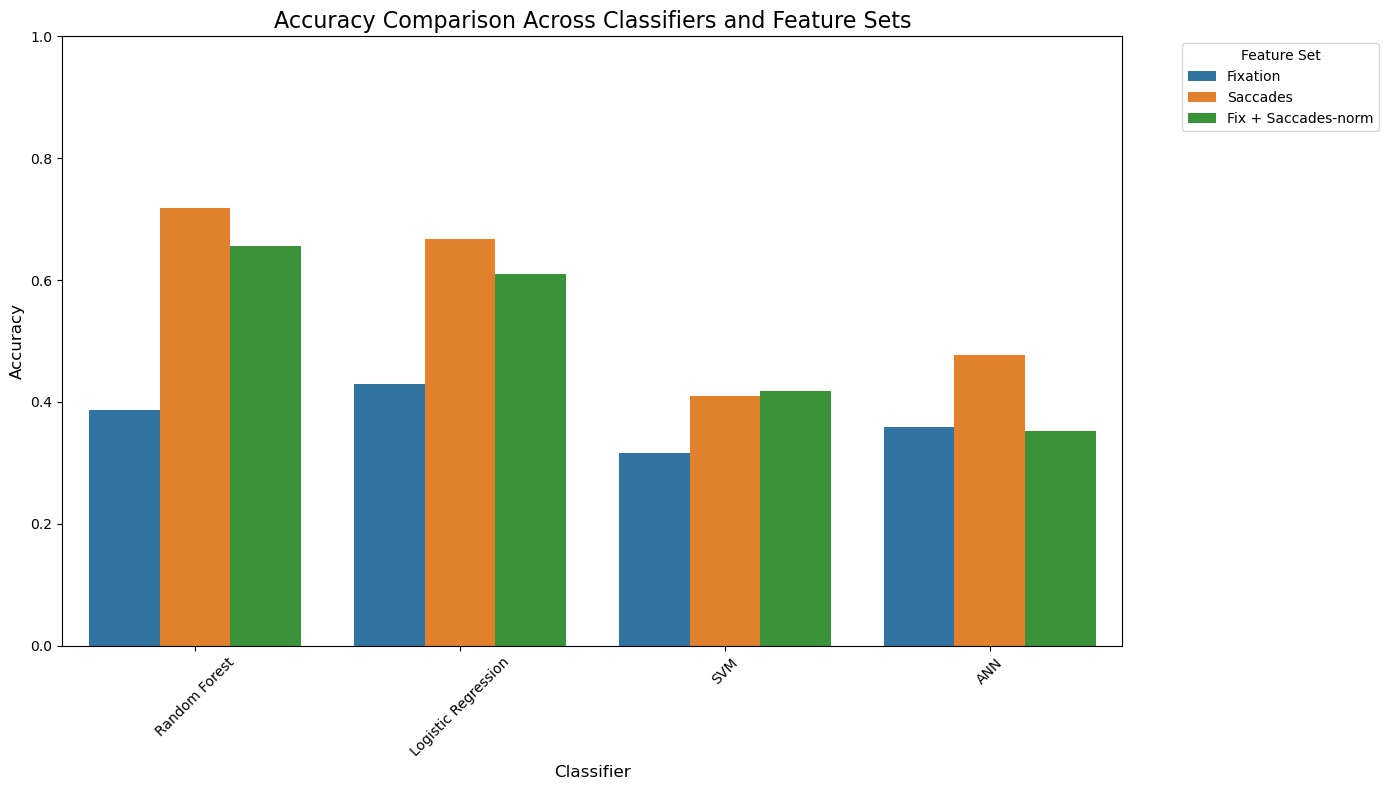

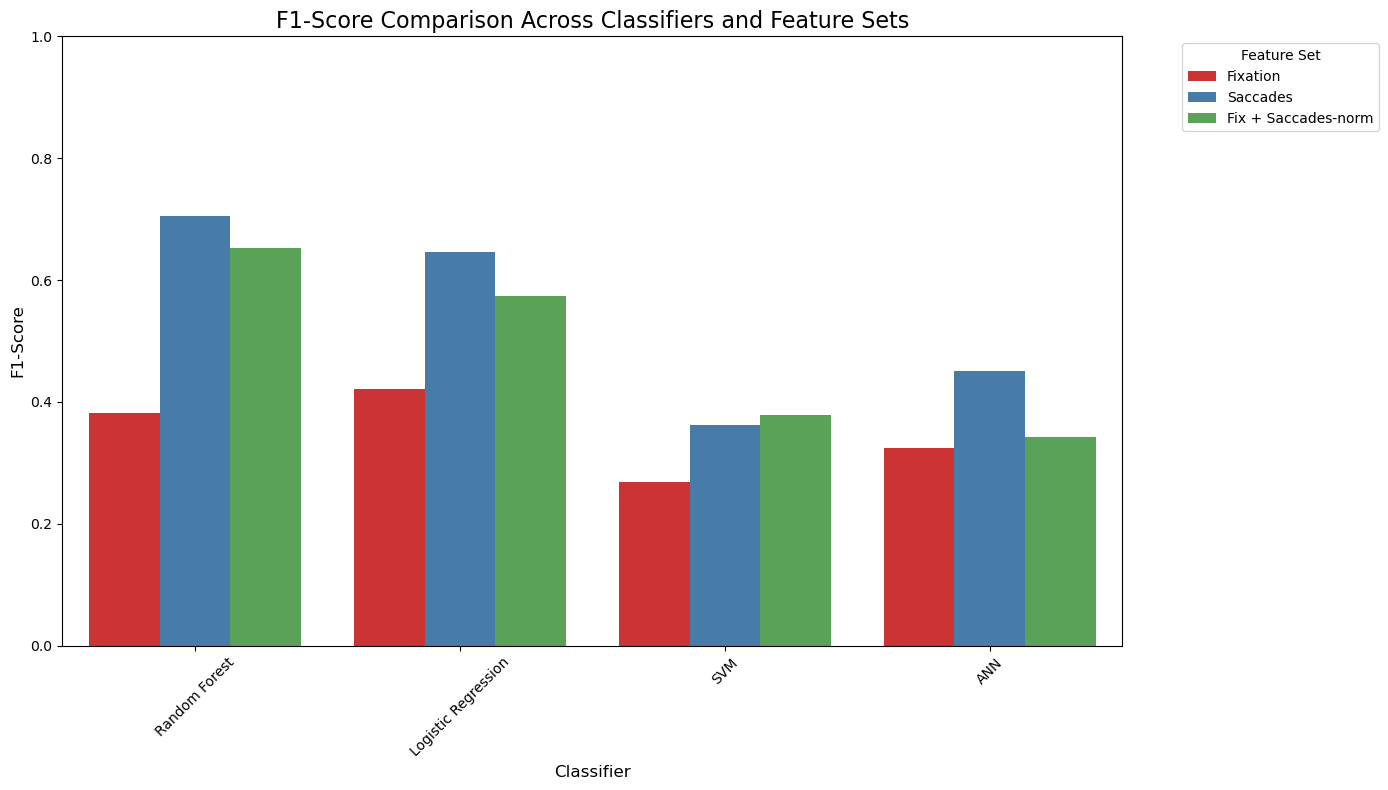

In [33]:
# Feature sets
fixation_features = ['n_fix', 'fix_mean', 'fix_max', 'norm_fix_mean', 'norm_fix_max', 'x_regressions', 'y_regressions']
saccades_features = ['up_freq', 'down_freq', 'left_freq', 'right_freq', 
                     'min_duration', 'avg_duration', 'max_duration', 
                     'min_vel', 'avg_vel', 'max_vel',
                     'min_ampl', 'avg_ampl', 'max_ampl',
                     'min_angle', 'avg_angle', 'max_angle',
                     'min_distance', 'avg_distance', 'max_distance',
                     'min_slope', 'avg_slope', 'max_slope']

# Prepare the results container
results = []

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', decision_function_shape='ovo'),  # One-vs-One for multi-class
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Function to run classification and collect results
def run_classification(X, y, feature_set_name):
    skf = StratifiedKFold(n_splits=5)
    class_names = y.unique()

    for clf_name, clf in classifiers.items():
        acc_scores = []
        f1_scores = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train the model
            clf.fit(X_train, y_train)

            # Predict
            y_pred = clf.predict(X_test)

            # Compute Accuracy and F1-score
            acc_scores.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Store the average performance for this classifier and feature set
        results.append({
            'feature_set': feature_set_name,
            'classifier': clf_name,
            'accuracy': np.mean(acc_scores),
            'f1_score': np.mean(f1_scores)
        })

# classification for Fixation features
run_classification(data[fixation_features], data['image'], 'Fixation')

# classification for Saccades features
run_classification(data[saccades_features], data['image'], 'Saccades')

# Normalize Fix + Saccades for each subject
data[fixation_features + saccades_features] = data.groupby('RECORDING_SESSION_LABEL')[fixation_features + saccades_features].transform(lambda x: x - x.mean())

# classification for Fix + Saccades (Normalized)
run_classification(data[fixation_features + saccades_features], data['image'], 'Fix + Saccades-norm')

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Plot Accuracy for Each Classifier and Feature Set
plt.figure(figsize=(14, 8))
sns.barplot(x='classifier', y='accuracy', hue='feature_set', data=results_df)
plt.title('Accuracy Comparison Across Classifiers and Feature Sets', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot F1-Score for Each Classifier and Feature Set
plt.figure(figsize=(14, 8))
sns.barplot(x='classifier', y='f1_score', hue='feature_set', data=results_df, palette='Set1')
plt.title('F1-Score Comparison Across Classifiers and Feature Sets', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the results to a CSV file
results_df.to_csv('fix_saccades_classification_comparison.csv', index=False)


In [23]:
print(results_df1)
print(results_df2)
print(results_df3)

            classifier  accuracy  f1_score feature_set
0        Random Forest  0.355128  0.346417    Fixation
1  Logistic Regression  0.354827  0.354863    Fixation
2                  SVM  0.351282  0.340249    Fixation
3                  ANN  0.316440  0.224778    Fixation
            classifier  accuracy  f1_score feature_set
0        Random Forest  0.688084  0.672161    Saccades
1  Logistic Regression  0.574359  0.557861    Saccades
2                  SVM  0.664555  0.656092    Saccades
3                  ANN  0.688084  0.671974    Saccades
            classifier  accuracy  f1_score          feature_set
0        Random Forest  0.680317  0.668292  Fix + Saccades-norm
1                  SVM  0.734540  0.719688  Fix + Saccades-norm
2                  ANN  0.355279  0.324065  Fix + Saccades-norm
3  Logistic Regression  0.711086  0.689991  Fix + Saccades-norm


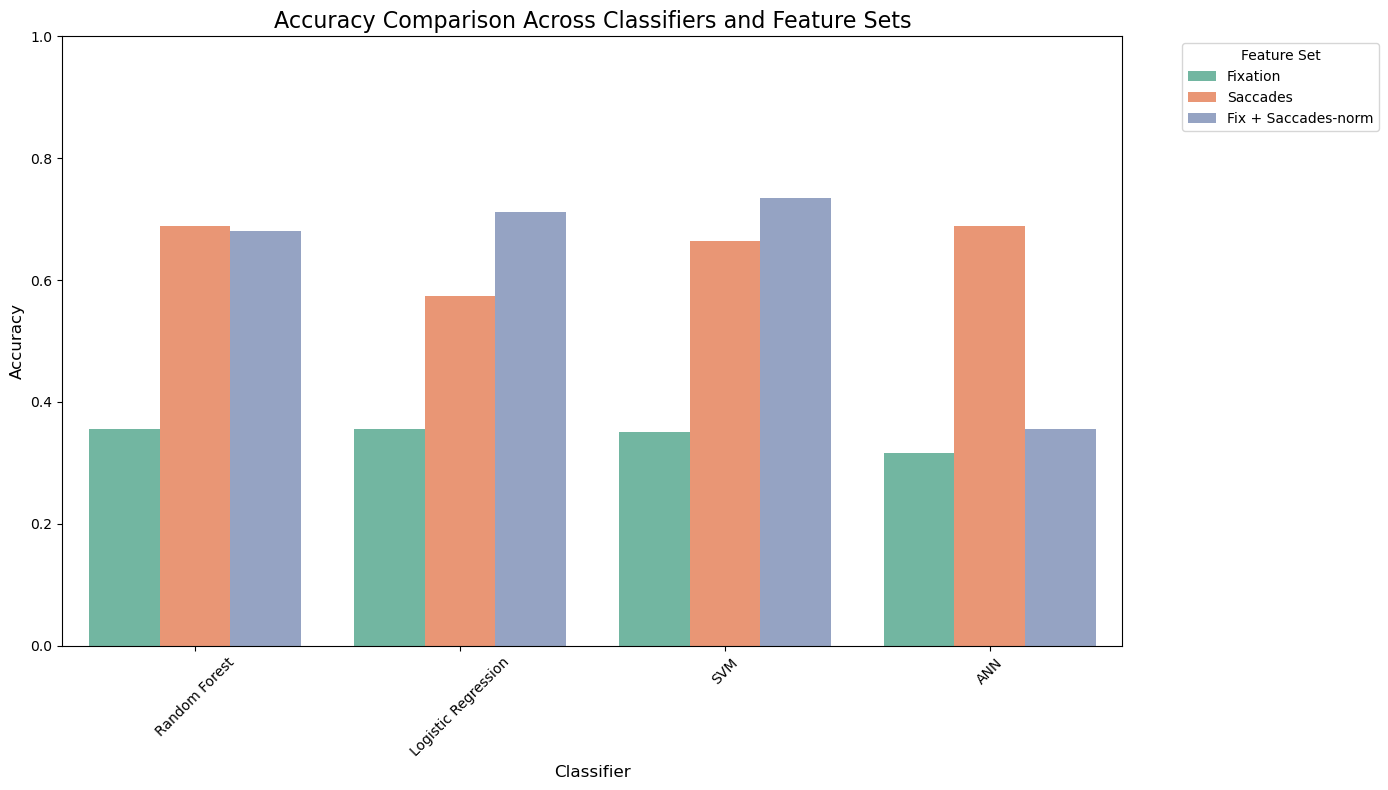

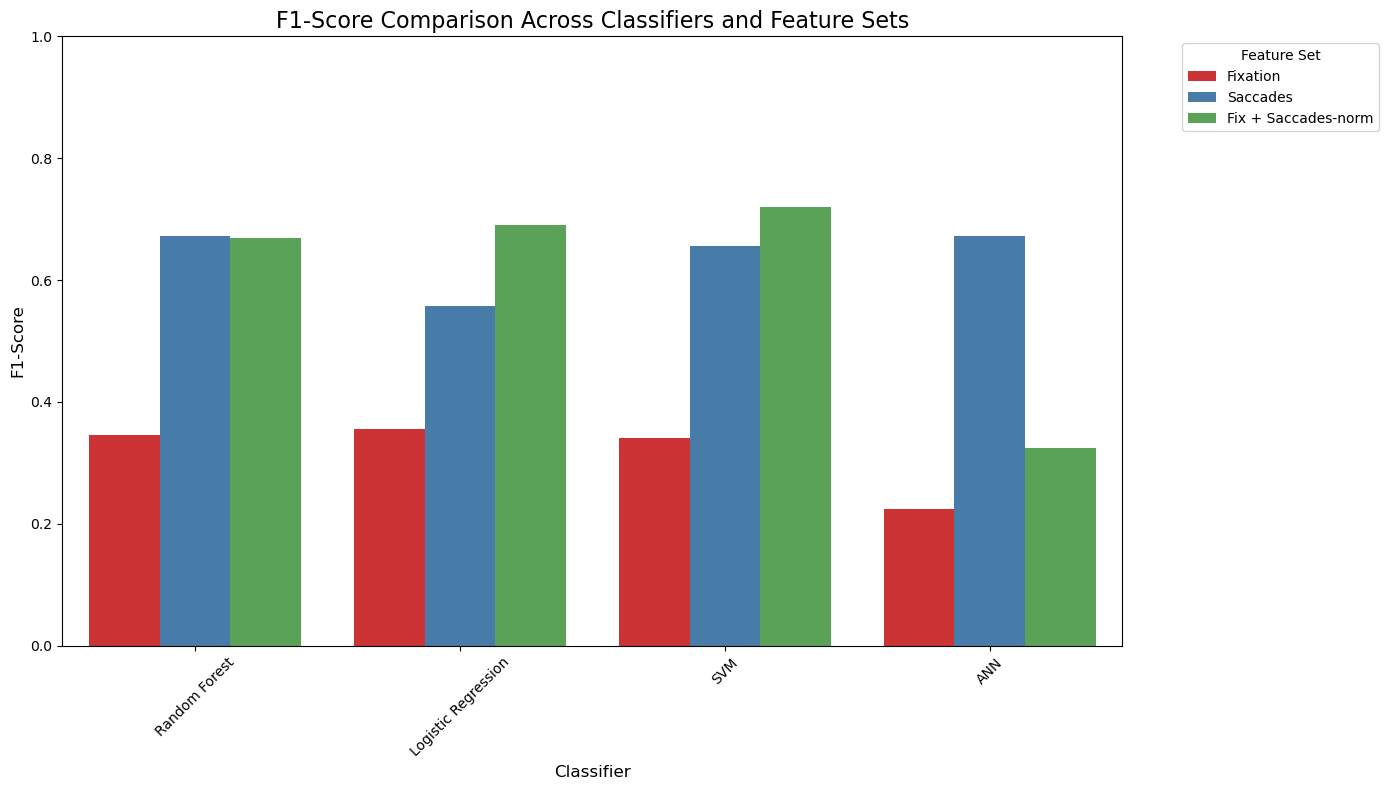

In [24]:
results_df1['feature_set'] = 'Fixation'
results_df2['feature_set'] = 'Saccades'
results_df3['feature_set'] = 'Fix + Saccades-norm'


combined_results_df = pd.concat([results_df1, results_df2, results_df_tuned], ignore_index=True)

# Step 1: Visualization - Accuracy
plt.figure(figsize=(14, 8))
sns.barplot(x='classifier', y='accuracy', hue='feature_set', data=combined_results_df, palette='Set2')
plt.title('Accuracy Comparison Across Classifiers and Feature Sets', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Visualization - F1-Score
plt.figure(figsize=(14, 8))
sns.barplot(x='classifier', y='f1_score', hue='feature_set', data=combined_results_df, palette='Set1')
plt.title('F1-Score Comparison Across Classifiers and Feature Sets', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
